In [3]:
# package 불러오기 
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt 
import requests
import seaborn as sns


#한글폰트 관련 
import matplotlib.font_manager as fm
import requests
font_name=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font',family=font_name)


In [24]:
#전기차 엑셀파일 불러오기 
elec_df=pd.read_excel('elec_car01.xlsx', index_col='년월')
elec_df.head()


,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,1201,396,638,251,200,106,191,26,833,177,102,181,142,407,267,462,3331
2018. 02,1202,424,630,258,202,110,193,26,851,179,103,180,145,414,275,468,3346
2018. 03,1289,452,747,277,220,133,200,29,964,199,115,185,157,442,290,517,3377
2018. 04,1408,492,822,300,248,151,225,49,1091,226,195,224,197,479,345,560,3491
2018. 05,1644,610,1021,368,308,187,280,57,1355,269,227,264,235,532,394,625,3541


In [25]:
elec_df = elec_df.filter(['서울', '부산', '대구', '인천', '광주', '대전', '울산'])
elec_df

,서울,부산,대구,인천,광주,대전,울산
년월,,,,,,,
2018. 01,1201,396,638,251,200,106,191
2018. 02,1202,424,630,258,202,110,193
2018. 03,1289,452,747,277,220,133,200
2018. 04,1408,492,822,300,248,151,225
2018. 05,1644,610,1021,368,308,187,280
2018. 06,2041,682,1698,509,435,331,354
2018. 07,2456,682,2056,605,525,460,401
2018. 08,2850,689,2392,692,619,589,454
2018. 09,3383,776,2783,731,696,728,550


In [26]:
elec_df = elec_df.reset_index()
elec_df

,년월,서울,부산,대구,인천,광주,대전,울산
0,2018. 01,1201,396,638,251,200,106,191
1,2018. 02,1202,424,630,258,202,110,193
2,2018. 03,1289,452,747,277,220,133,200
3,2018. 04,1408,492,822,300,248,151,225
4,2018. 05,1644,610,1021,368,308,187,280
5,2018. 06,2041,682,1698,509,435,331,354
6,2018. 07,2456,682,2056,605,525,460,401
7,2018. 08,2850,689,2392,692,619,589,454
8,2018. 09,3383,776,2783,731,696,728,550
9,2018. 10,3892,951,3051,758,858,867,663


In [35]:
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'서울 증가율(%)'] = ((elec_df.loc[i+1, '서울']-elec_df.loc[i, '서울'])/elec_df.loc[i, '서울'])*100
    except :
        elec_df.loc[i+1,'서울 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'부산 증가율(%)'] = ((elec_df.loc[i+1, '부산']-elec_df.loc[i, '부산'])/elec_df.loc[i, '부산'])*100
    except :
        elec_df.loc[i+1,'부산 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'대구 증가율(%)'] = ((elec_df.loc[i+1, '대구']-elec_df.loc[i, '대구'])/elec_df.loc[i, '대구'])*100
    except :
        elec_df.loc[i+1,'대구 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'인천 증가율(%)'] = ((elec_df.loc[i+1, '인천']-elec_df.loc[i, '인천'])/elec_df.loc[i, '인천'])*100
    except :
        elec_df.loc[i+1,'인천 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'광주 증가율(%)'] = ((elec_df.loc[i+1, '광주']-elec_df.loc[i, '광주'])/elec_df.loc[i, '광주'])*100
    except :
        elec_df.loc[i+1,'광주 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'대전 증가율(%)'] = ((elec_df.loc[i+1, '대전']-elec_df.loc[i, '대전'])/elec_df.loc[i, '대전'])*100
    except :
        elec_df.loc[i+1,'대전 증가율(%)'] = np.nan
        
for i in elec_df.index :
    try :
        elec_df.loc[i+1,'울산 증가율(%)'] = ((elec_df.loc[i+1, '울산']-elec_df.loc[i, '울산'])/elec_df.loc[i, '울산'])*100
    except :
        elec_df.loc[i+1,'울산 증가율(%)'] = np.nan
        

elec_df

,년월,서울,부산,대구,인천,광주,대전,울산,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%)
0,2018. 01,1201.0,396.0,638.0,251.0,200.0,106.0,191.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2018. 02,1202.0,424.0,630.0,258.0,202.0,110.0,193.0,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120
2,2018. 03,1289.0,452.0,747.0,277.0,220.0,133.0,200.0,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943
3,2018. 04,1408.0,492.0,822.0,300.0,248.0,151.0,225.0,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000
4,2018. 05,1644.0,610.0,1021.0,368.0,308.0,187.0,280.0,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444
5,2018. 06,2041.0,682.0,1698.0,509.0,435.0,331.0,354.0,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571
6,2018. 07,2456.0,682.0,2056.0,605.0,525.0,460.0,401.0,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836
7,2018. 08,2850.0,689.0,2392.0,692.0,619.0,589.0,454.0,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958
8,2018. 09,3383.0,776.0,2783.0,731.0,696.0,728.0,550.0,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374
9,2018. 10,3892.0,951.0,3051.0,758.0,858.0,867.0,663.0,15.045817,22.551546,9.629896,3.693570,23.275862,19.093407,20.545455


In [36]:
elec_df = elec_df.dropna(how='all')
elec_df = elec_df.fillna(0)
elec_df

,년월,서울,부산,대구,인천,광주,대전,울산,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%)
0,2018. 01,1201.0,396.0,638.0,251.0,200.0,106.0,191.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018. 02,1202.0,424.0,630.0,258.0,202.0,110.0,193.0,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120
2,2018. 03,1289.0,452.0,747.0,277.0,220.0,133.0,200.0,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943
3,2018. 04,1408.0,492.0,822.0,300.0,248.0,151.0,225.0,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000
4,2018. 05,1644.0,610.0,1021.0,368.0,308.0,187.0,280.0,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444
5,2018. 06,2041.0,682.0,1698.0,509.0,435.0,331.0,354.0,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571
6,2018. 07,2456.0,682.0,2056.0,605.0,525.0,460.0,401.0,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836
7,2018. 08,2850.0,689.0,2392.0,692.0,619.0,589.0,454.0,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958
8,2018. 09,3383.0,776.0,2783.0,731.0,696.0,728.0,550.0,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374
9,2018. 10,3892.0,951.0,3051.0,758.0,858.0,867.0,663.0,15.045817,22.551546,9.629896,3.693570,23.275862,19.093407,20.545455


In [44]:
elec_df.set_index('년월',inplace=True)
elec_df

,서울,부산,대구,인천,광주,대전,울산,서울 증가율(%),부산 증가율(%),대구 증가율(%),인천 증가율(%),광주 증가율(%),대전 증가율(%),울산 증가율(%)
년월,,,,,,,,,,,,,,
2018. 01,1201.0,396.0,638.0,251.0,200.0,106.0,191.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018. 02,1202.0,424.0,630.0,258.0,202.0,110.0,193.0,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120
2018. 03,1289.0,452.0,747.0,277.0,220.0,133.0,200.0,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943
2018. 04,1408.0,492.0,822.0,300.0,248.0,151.0,225.0,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000
2018. 05,1644.0,610.0,1021.0,368.0,308.0,187.0,280.0,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444
2018. 06,2041.0,682.0,1698.0,509.0,435.0,331.0,354.0,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571
2018. 07,2456.0,682.0,2056.0,605.0,525.0,460.0,401.0,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836
2018. 08,2850.0,689.0,2392.0,692.0,619.0,589.0,454.0,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958
2018. 09,3383.0,776.0,2783.0,731.0,696.0,728.0,550.0,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374


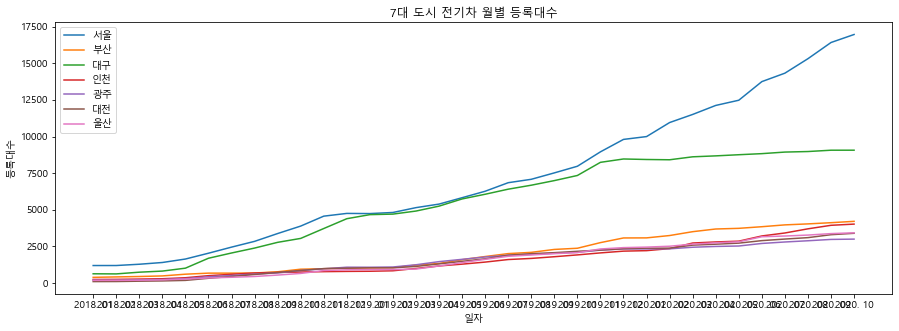

In [49]:
plt.figure(figsize=(15,5)) 
plt.plot(elec_df.index, elec_df['서울'].values, label='서울')
plt.plot(elec_df.index, elec_df['부산'].values, label='부산')
plt.plot(elec_df.index, elec_df['대구'].values, label='대구')
plt.plot(elec_df.index, elec_df['인천'].values, label='인천')
plt.plot(elec_df.index, elec_df['광주'].values, label='광주')
plt.plot(elec_df.index, elec_df['대전'].values, label='대전')
plt.plot(elec_df.index, elec_df['울산'].values, label='울산')
#plt.bar(bydate.index, bydate.values, label='일일 확진자 수', color='r')
plt.title('7대 도시 전기차 월별 등록대수')
plt.xlabel('일자')
plt.ylabel('등록대수')
plt.legend()
plt.show()

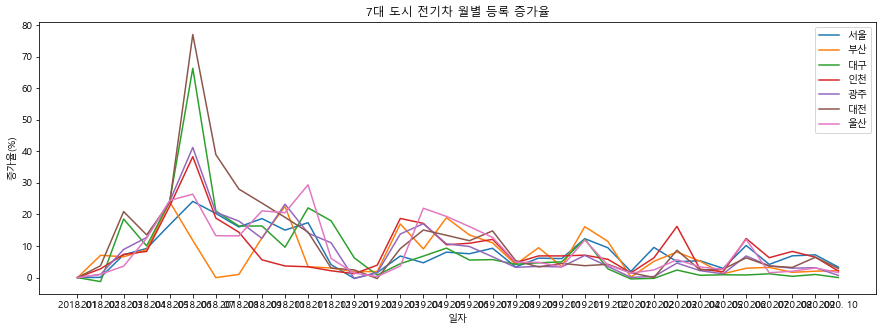

In [50]:
plt.figure(figsize=(15,5)) 
plt.plot(elec_df.index, elec_df['서울 증가율(%)'].values, label='서울')
plt.plot(elec_df.index, elec_df['부산 증가율(%)'].values, label='부산')
plt.plot(elec_df.index, elec_df['대구 증가율(%)'].values, label='대구')
plt.plot(elec_df.index, elec_df['인천 증가율(%)'].values, label='인천')
plt.plot(elec_df.index, elec_df['광주 증가율(%)'].values, label='광주')
plt.plot(elec_df.index, elec_df['대전 증가율(%)'].values, label='대전')
plt.plot(elec_df.index, elec_df['울산 증가율(%)'].values, label='울산')
#plt.bar(bydate.index, bydate.values, label='일일 확진자 수', color='r')
plt.title('7대 도시 전기차 월별 등록 증가율')
plt.xlabel('일자')
plt.ylabel('증가율(%)')
plt.legend()
plt.show()

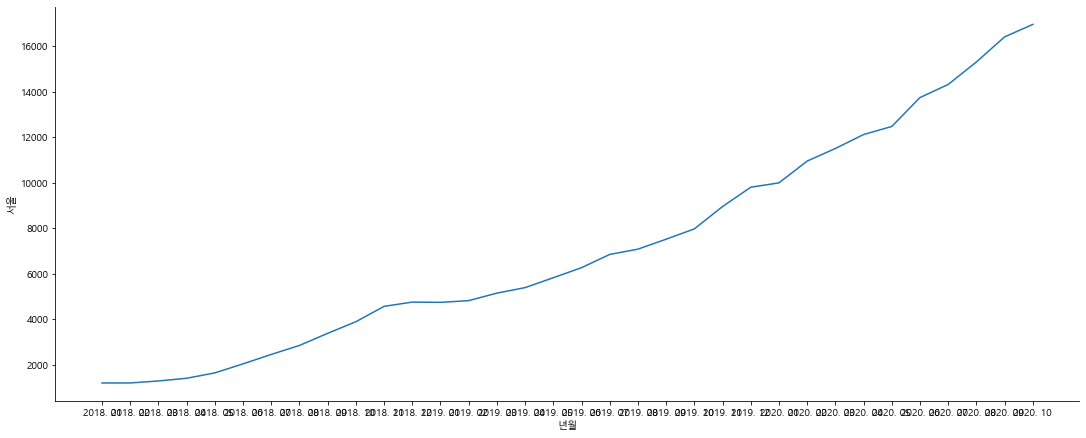

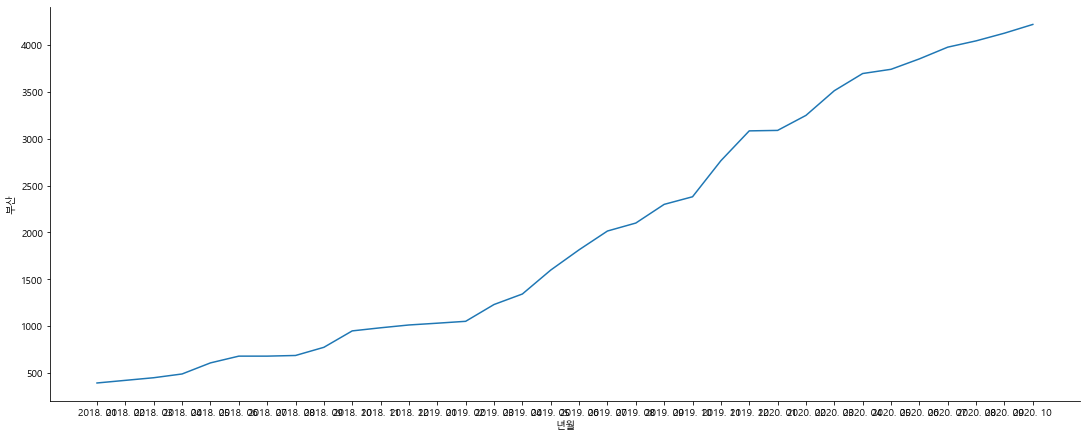

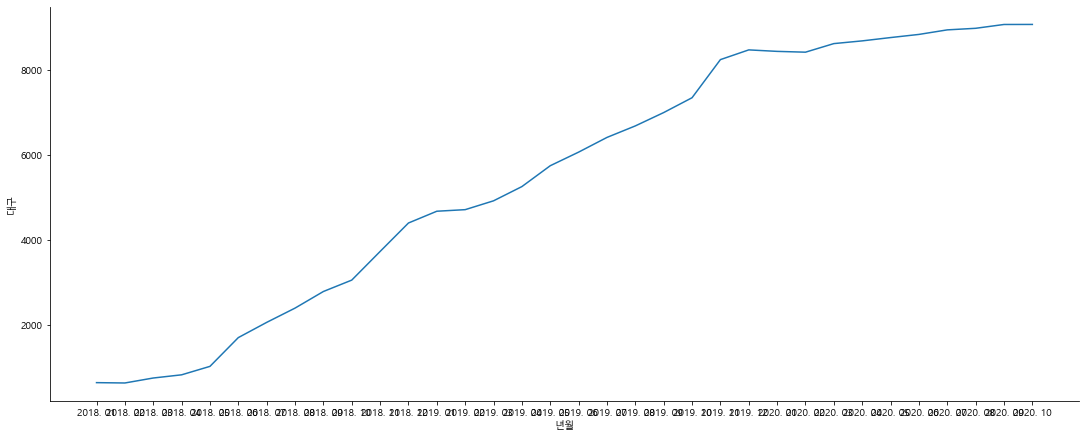

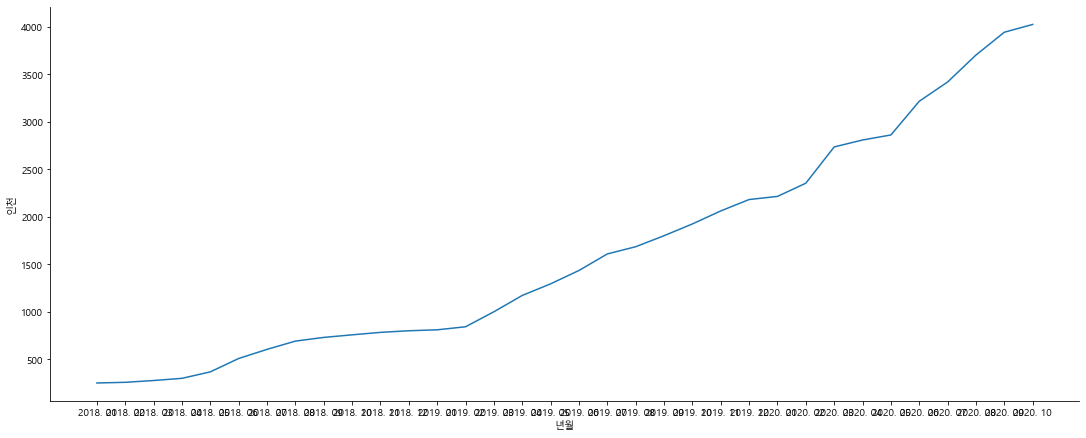

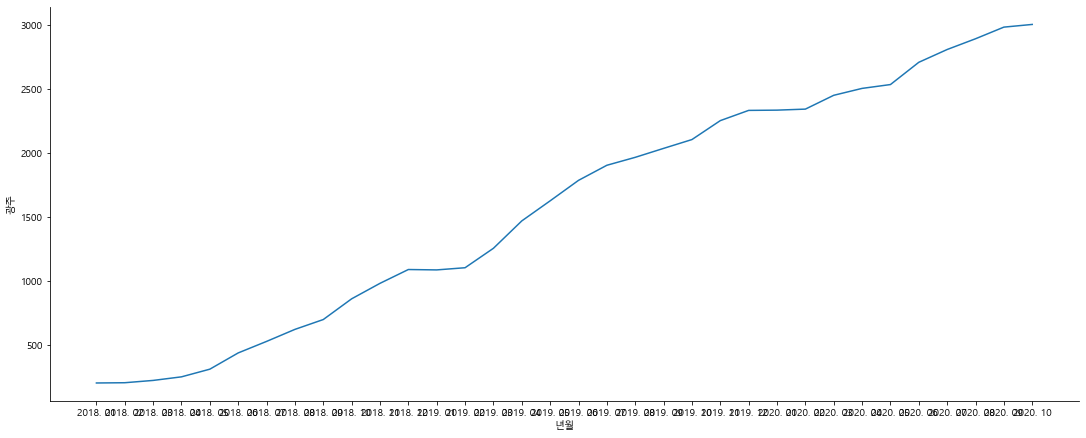

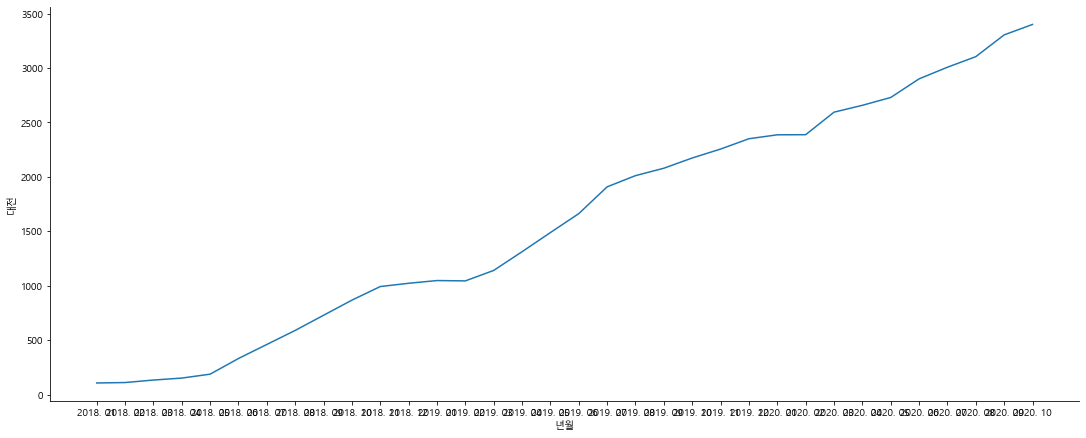

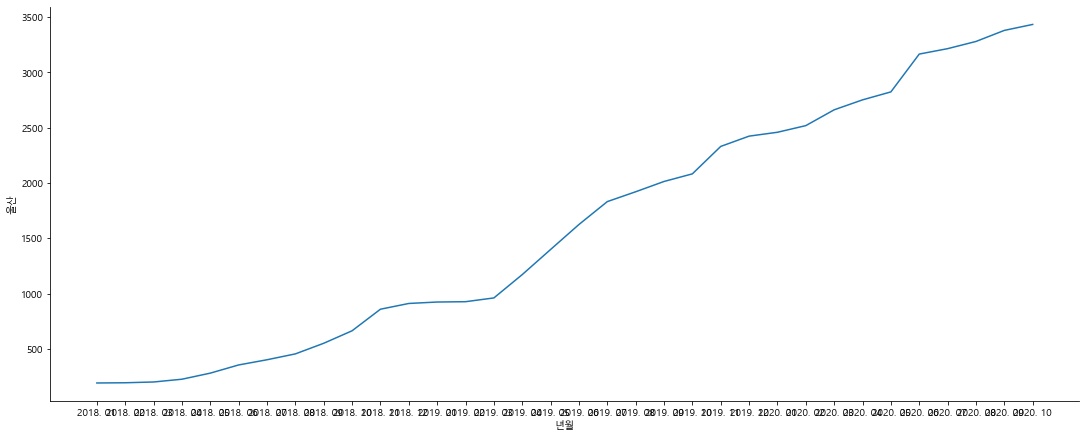

In [62]:
sns.relplot(x="년월", y="서울", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="부산", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="대구", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="인천", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="광주", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="대전", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="울산", data=elec_df, kind='line', height=6, aspect=2.5)

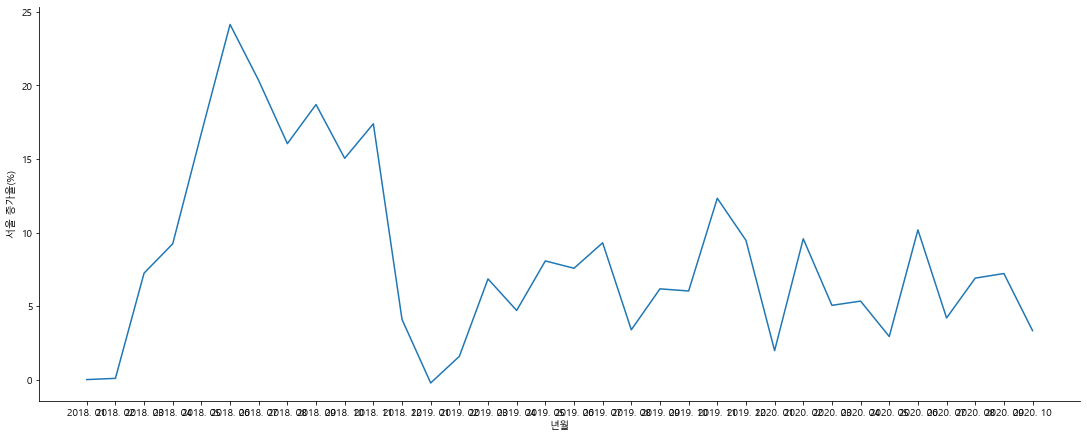

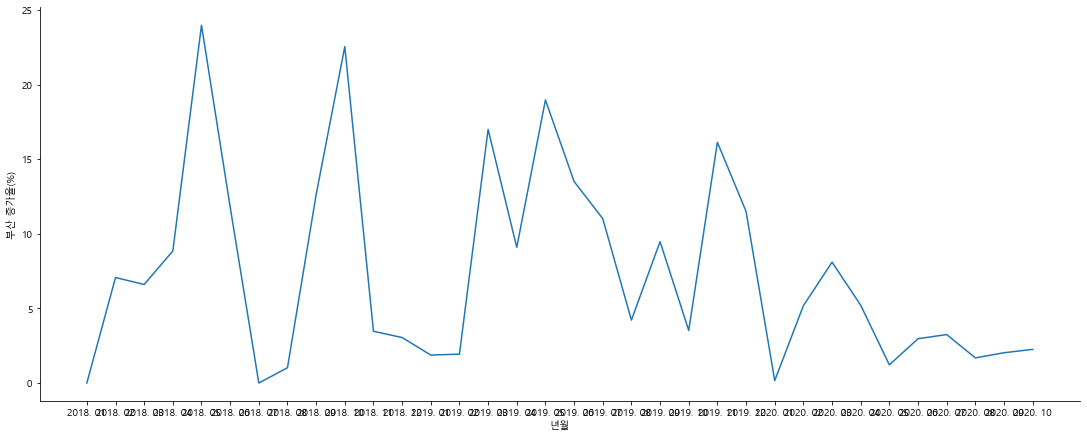

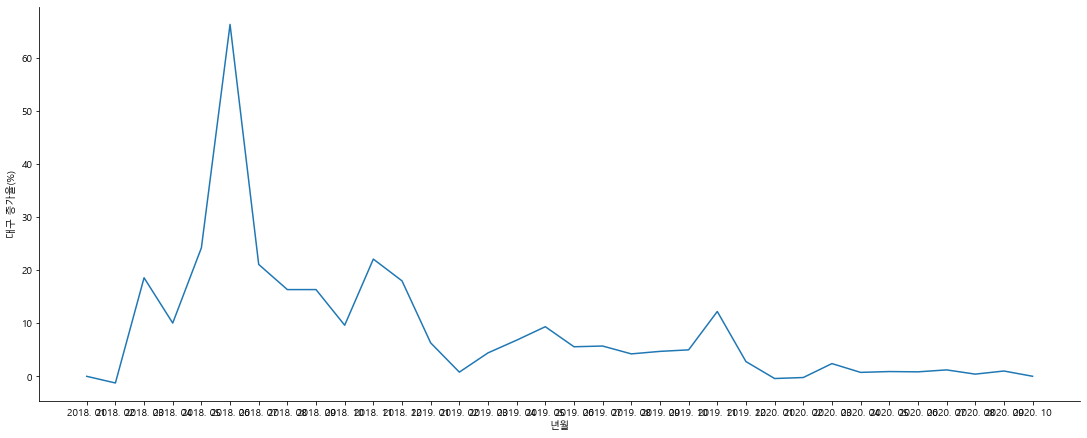

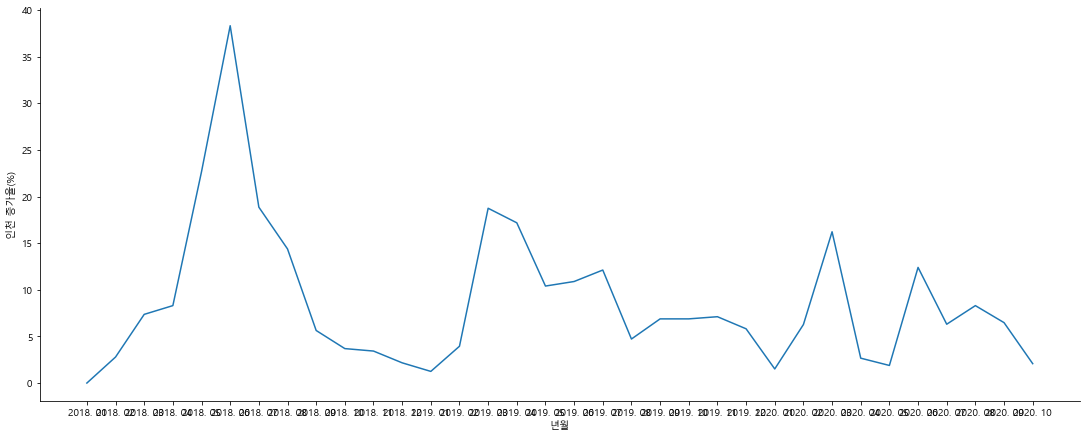

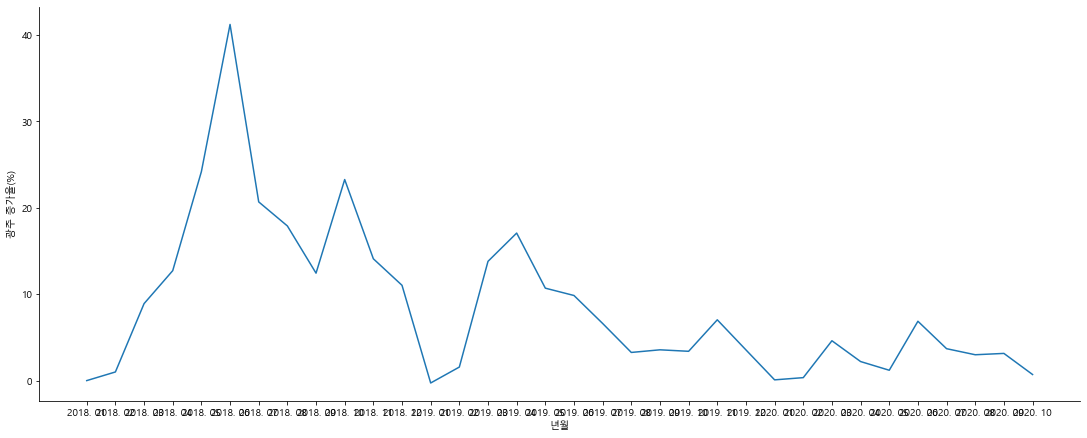

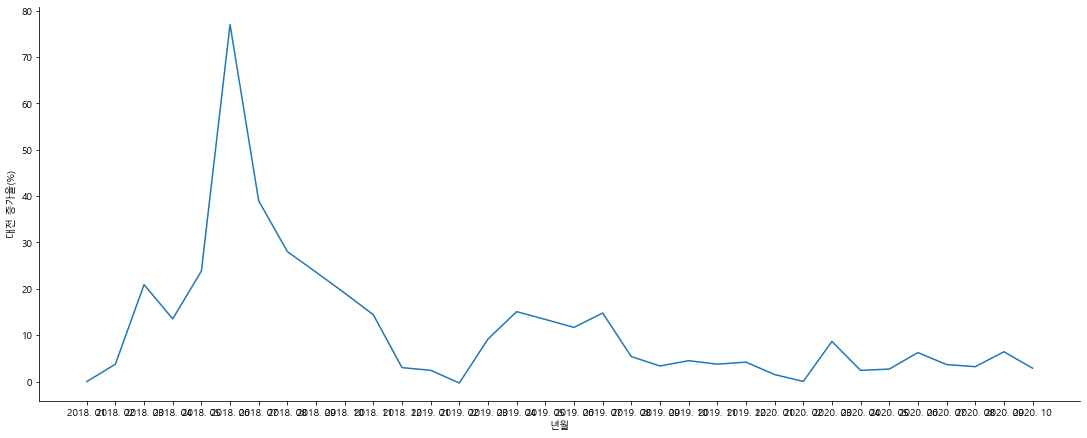

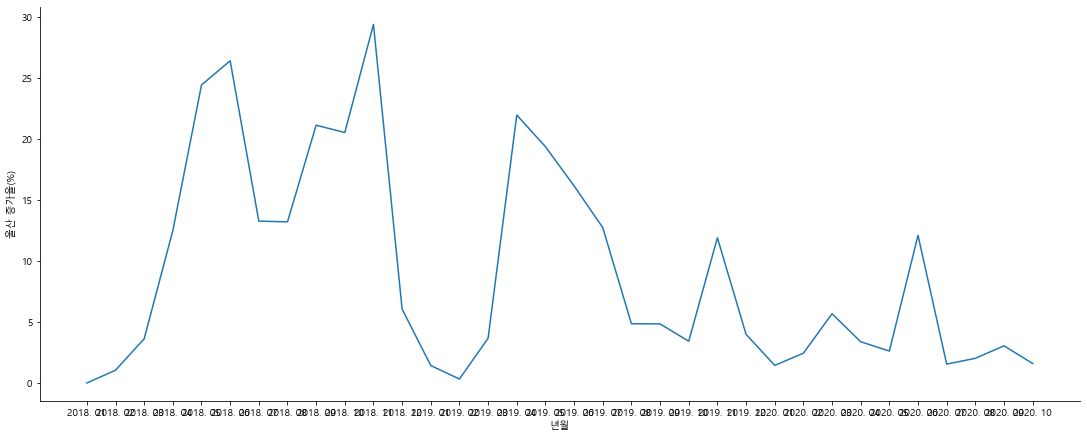

In [63]:
sns.relplot(x="년월", y="서울 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="부산 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="대구 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="인천 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="광주 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="대전 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)
sns.relplot(x="년월", y="울산 증가율(%)", data=elec_df, kind='line', height=6, aspect=2.5)

In [6]:
elec_df['연도'] = elec_df['년월'].str.split('. ').str[0]
elec_df['월'] = elec_df['년월'].str.split('. ').str[1]
elec_df

,년월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,연도,월
0,2018. 01,1201,396,638,251,200,106,191,26,833,177,102,181,142,407,267,462,3331,2018,01
1,2018. 02,1202,424,630,258,202,110,193,26,851,179,103,180,145,414,275,468,3346,2018,02
2,2018. 03,1289,452,747,277,220,133,200,29,964,199,115,185,157,442,290,517,3377,2018,03
3,2018. 04,1408,492,822,300,248,151,225,49,1091,226,195,224,197,479,345,560,3491,2018,04
4,2018. 05,1644,610,1021,368,308,187,280,57,1355,269,227,264,235,532,394,625,3541,2018,05
5,2018. 06,2041,682,1698,509,435,331,354,70,1905,339,262,349,272,631,490,751,3862,2018,06
6,2018. 07,2456,682,2056,605,525,460,401,72,2296,385,295,382,308,655,521,859,4557,2018,07
7,2018. 08,2850,689,2392,692,619,589,454,77,2595,463,308,401,328,698,556,953,5019,2018,08
8,2018. 09,3383,776,2783,731,696,728,550,189,2884,562,334,451,459,803,702,970,6010,2018,09
9,2018. 10,3892,951,3051,758,858,867,663,205,3283,682,760,580,521,891,884,1210,6735,2018,10


In [175]:
index = elec_df.index
index

Index(['2018. 01', '2018. 02', '2018. 03', '2018. 04', '2018. 05', '2018. 06',
       '2018. 07', '2018. 08', '2018. 09', '2018. 10', '2018. 11', '2018. 12',
       '2019. 01', '2019. 02', '2019. 03', '2019. 04', '2019. 05', '2019. 06',
       '2019. 07', '2019. 08', '2019. 09', '2019. 10', '2019. 11', '2019. 12',
       '2020. 01', '2020. 02', '2020. 03', '2020. 04', '2020. 05', '2020. 06',
       '2020. 07', '2020. 08', '2020. 09', '2020. 10'],
      dtype='object', name='년월')

In [176]:
columns = elec_df.columns
columns

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],
      dtype='object')

In [177]:
# fuel 파일 불러오기 
fuel_df=pd.read_excel('fuel_car01.xlsx',index_col='년월') 
fuel_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,2643177,1088666,958979,1268157,535707,549043,460716,112123,4391093,562318,600260,796339,671863,714511,1025050,1316339,400276
2018. 02,2643317,1091492,960286,1272896,536338,549229,461396,114005,4401156,563289,601707,799108,673028,716281,1026505,1318231,403364
2018. 03,2643039,1094475,962578,1277685,537527,549922,462642,115849,4419701,565157,603992,802670,674568,719811,1028907,1321802,407739
2018. 04,2646341,1098482,963901,1282664,538609,550994,463830,117703,4439557,567011,606479,805577,677150,722820,1031583,1324208,412303
2018. 05,2647416,1101881,965639,1287148,539578,551570,464640,119168,4458428,568368,608568,807971,679042,726511,1034074,1325821,416861


In [9]:
# 전기차 증가율 (201802)
inc_rate_elec_1802 = ((elec_df.iloc[1]-elec_df.iloc[0])/elec_df.iloc[0])*100
inc_rate_elec_1802 = inc_rate_elec_1802.to_frame()
inc_rate_elec_1802

,0
서울,0.083264
부산,7.070707
대구,-1.253918
인천,2.788845
광주,1.000000
대전,3.773585
울산,1.047120
세종,0.000000
경기,2.160864
강원,1.129944


In [ ]:
inc_rate_elec_1802

In [179]:
# 전기차 증가율 (201803)
inc_rate_elec_1803 = ((elec_df.iloc[2]-elec_df.iloc[1])/elec_df.iloc[1])*100
inc_rate_elec_1803 = inc_rate_elec_1803.to_frame()
inc_rate_elec_1803

,0
서울,7.237937
부산,6.603774
대구,18.571429
인천,7.364341
광주,8.910891
대전,20.909091
울산,3.626943
세종,11.538462
경기,13.278496
강원,11.173184


In [180]:
# 전기차 증가율 (201804)
inc_rate_elec_1804 = ((elec_df.iloc[3]-elec_df.iloc[2])/elec_df.iloc[2])*100
inc_rate_elec_1804 = inc_rate_elec_1804.to_frame()
inc_rate_elec_1804

,0
서울,9.231963
부산,8.849558
대구,10.040161
인천,8.303249
광주,12.727273
대전,13.533835
울산,12.500000
세종,68.965517
경기,13.174274
강원,13.567839


In [181]:
# 전기차 증가율 (201805)
inc_rate_elec_1805 = ((elec_df.iloc[4]-elec_df.iloc[3])/elec_df.iloc[3])*100
inc_rate_elec_1805 = inc_rate_elec_1805.to_frame()
inc_rate_elec_1805

,0
서울,16.761364
부산,23.983740
대구,24.209246
인천,22.666667
광주,24.193548
대전,23.841060
울산,24.444444
세종,16.326531
경기,24.197984
강원,19.026549


In [182]:
# 전기차 증가율 (201806)
inc_rate_elec_1806 = ((elec_df.iloc[5]-elec_df.iloc[4])/elec_df.iloc[4])*100
inc_rate_elec_1806 = inc_rate_elec_1806.to_frame()
inc_rate_elec_1806

,0
서울,24.148418
부산,11.803279
대구,66.307542
인천,38.315217
광주,41.233766
대전,77.005348
울산,26.428571
세종,22.807018
경기,40.590406
강원,26.022305


In [183]:
# 전기차 증가율 (201807)
inc_rate_elec_1807 = ((elec_df.iloc[6]-elec_df.iloc[5])/elec_df.iloc[5])*100
inc_rate_elec_1807 = inc_rate_elec_1807.to_frame()
inc_rate_elec_1807

,0
서울,20.333170
부산,0.000000
대구,21.083628
인천,18.860511
광주,20.689655
대전,38.972810
울산,13.276836
세종,2.857143
경기,20.524934
강원,13.569322


In [184]:
# 전기차 증가율 (201808)
inc_rate_elec_1808 = ((elec_df.iloc[7]-elec_df.iloc[6])/elec_df.iloc[6])*100
inc_rate_elec_1808 = inc_rate_elec_1808.to_frame()
inc_rate_elec_1808

,0
서울,16.042345
부산,1.026393
대구,16.342412
인천,14.380165
광주,17.904762
대전,28.043478
울산,13.216958
세종,6.944444
경기,13.022648
강원,20.259740


In [185]:
# 전기차 증가율 (201809)
inc_rate_elec_1809 = ((elec_df.iloc[8]-elec_df.iloc[7])/elec_df.iloc[7])*100
inc_rate_elec_1809 = inc_rate_elec_1809.to_frame()
inc_rate_elec_1809

,0
서울,18.701754
부산,12.626996
대구,16.346154
인천,5.635838
광주,12.439418
대전,23.599321
울산,21.145374
세종,145.454545
경기,11.136802
강원,21.382289


In [186]:
# 전기차 증가율 (201810)
inc_rate_elec_1810 = ((elec_df.iloc[9]-elec_df.iloc[8])/elec_df.iloc[8])*100
inc_rate_elec_1810 = inc_rate_elec_1810.to_frame()
inc_rate_elec_1810

,0
서울,15.045817
부산,22.551546
대구,9.629896
인천,3.693570
광주,23.275862
대전,19.093407
울산,20.545455
세종,8.465608
경기,13.834951
강원,21.352313


In [187]:
# 전기차 증가율 (201811)
inc_rate_elec_1811 = ((elec_df.iloc[10]-elec_df.iloc[9])/elec_df.iloc[9])*100
inc_rate_elec_1811 = inc_rate_elec_1811.to_frame()
inc_rate_elec_1811

,0
서울,17.394656
부산,3.470032
대구,22.091118
인천,3.430079
광주,14.102564
대전,14.417532
울산,29.411765
세종,6.341463
경기,14.163875
강원,24.926686


In [188]:
# 전기차 증가율 (201812)
inc_rate_elec_1812 = ((elec_df.iloc[11]-elec_df.iloc[10])/elec_df.iloc[10])*100
inc_rate_elec_1812 = inc_rate_elec_1812.to_frame()
inc_rate_elec_1812

,0
서울,4.092799
부산,3.048780
대구,17.986577
인천,2.168367
광주,11.031665
대전,3.024194
울산,6.060606
세종,0.000000
경기,4.188901
강원,4.929577


In [189]:
# 전기차 증가율 (201901)
inc_rate_elec_1901 = ((elec_df.iloc[12]-elec_df.iloc[11])/elec_df.iloc[11])*100
inc_rate_elec_1901 = inc_rate_elec_1901.to_frame()
inc_rate_elec_1901

,0
서울,-0.231287
부산,1.873767
대구,6.302617
인천,1.248439
광주,-0.275989
대전,2.446184
울산,1.428571
세종,3.669725
경기,1.049936
강원,1.565996


In [190]:
# 전기차 증가율 (201902)
inc_rate_elec_1902 = ((elec_df.iloc[13]-elec_df.iloc[12])/elec_df.iloc[12])*100
inc_rate_elec_1902 = inc_rate_elec_1902.to_frame()
inc_rate_elec_1902

,0
서울,1.580611
부산,1.936108
대구,0.791952
인천,3.945746
광주,1.568266
대전,-0.286533
울산,0.325027
세종,3.539823
경기,1.799290
강원,2.973568


In [191]:
# 전기차 증가율 (201903)
inc_rate_elec_1903 = ((elec_df.iloc[14]-elec_df.iloc[13])/elec_df.iloc[13])*100
inc_rate_elec_1903 = inc_rate_elec_1903.to_frame()
inc_rate_elec_1903

,0
서울,6.846473
부산,16.999050
대구,4.417074
인천,18.742586
광주,13.805631
대전,9.195402
울산,3.671706
세종,47.863248
경기,16.156336
강원,13.475936


In [192]:
# 전기차 증가율 (201904)
inc_rate_elec_1904 = ((elec_df.iloc[15]-elec_df.iloc[14])/elec_df.iloc[14])*100
inc_rate_elec_1904 = inc_rate_elec_1904.to_frame()
inc_rate_elec_1904

,0
서울,4.699029
부산,9.090909
대구,6.813097
인천,17.182817
광주,17.079010
대전,15.087719
울산,21.979167
세종,28.034682
경기,12.708958
강원,12.818096


In [193]:
# 전기차 증가율 (201905)
inc_rate_elec_1905 = ((elec_df.iloc[16]-elec_df.iloc[15])/elec_df.iloc[15])*100
inc_rate_elec_1905 = inc_rate_elec_1905.to_frame()
inc_rate_elec_1905

,0
서울,8.067507
부산,18.973214
대구,9.348819
인천,10.400682
광주,10.702113
대전,13.414634
울산,19.385141
세종,17.155756
경기,13.139380
강원,9.189641


In [194]:
# 전기차 증가율 (201906)
inc_rate_elec_1906 = ((elec_df.iloc[17]-elec_df.iloc[16])/elec_df.iloc[16])*100
inc_rate_elec_1906 = inc_rate_elec_1906.to_frame()
inc_rate_elec_1906

,0
서울,7.568217
부산,13.508443
대구,5.572001
인천,10.888031
광주,9.852217
대전,11.693548
울산,16.165951
세종,10.597303
경기,10.840336
강원,8.416220


In [195]:
# 전기차 증가율 (201907)
inc_rate_elec_1907 = ((elec_df.iloc[18]-elec_df.iloc[17])/elec_df.iloc[17])*100
inc_rate_elec_1907 = inc_rate_elec_1907.to_frame()
inc_rate_elec_1907

,0
서울,9.301213
부산,11.019284
대구,5.706746
인천,12.116992
광주,6.614350
대전,14.801444
울산,12.746305
세종,1.916376
경기,9.401061
강원,13.620325


In [196]:
# 전기차 증가율 (201908)
inc_rate_elec_1908 = ((elec_df.iloc[19]-elec_df.iloc[18])/elec_df.iloc[18])*100
inc_rate_elec_1908 = inc_rate_elec_1908.to_frame()
inc_rate_elec_1908

,0
서울,3.386367
부산,4.218362
대구,4.228429
인천,4.720497
광주,3.259727
대전,5.398323
울산,4.860732
세종,2.222222
경기,5.114345
강원,6.397516


In [197]:
# 전기차 증가율 (201909)
inc_rate_elec_1909 = ((elec_df.iloc[20]-elec_df.iloc[19])/elec_df.iloc[19])*100
inc_rate_elec_1909 = inc_rate_elec_1909.to_frame()
inc_rate_elec_1909

,0
서울,6.169702
부산,9.476190
대구,4.700599
인천,6.880190
광주,3.564155
대전,3.381402
울산,4.843750
세종,4.347826
경기,5.010549
강원,5.720957


In [198]:
# 전기차 증가율 (201910)
inc_rate_elec_1910 = ((elec_df.iloc[21]-elec_df.iloc[20])/elec_df.iloc[20])*100
inc_rate_elec_1910 = inc_rate_elec_1910.to_frame()
inc_rate_elec_1910

,0
서울,6.023936
부산,3.523271
대구,4.989991
인천,6.881243
광주,3.392330
대전,4.521405
울산,3.427720
세종,1.602564
경기,5.637870
강원,3.368305


In [199]:
# 전기차 증가율 (201911)
inc_rate_elec_1911 = ((elec_df.iloc[22]-elec_df.iloc[21])/elec_df.iloc[21])*100
inc_rate_elec_1911 = inc_rate_elec_1911.to_frame()
inc_rate_elec_1911

,0
서울,12.329111
부산,16.134454
대구,12.215716
인천,7.113188
광주,7.037565
대전,3.773585
울산,11.911623
세종,1.577287
경기,5.372638
강원,5.715812


In [200]:
# 전기차 증가율 (201912)
inc_rate_elec_1912 = ((elec_df.iloc[23]-elec_df.iloc[22])/elec_df.iloc[22])*100
inc_rate_elec_1912 = inc_rate_elec_1912.to_frame()
inc_rate_elec_1912

,0
서울,9.468513
부산,11.505065
대구,2.779126
인천,5.816772
광주,3.553976
대전,4.212860
울산,3.991416
세종,3.260870
경기,3.181049
강원,2.728651


In [201]:
# 전기차 증가율 (202001)
inc_rate_elec_2001 = ((elec_df.iloc[24]-elec_df.iloc[23])/elec_df.iloc[23])*100
inc_rate_elec_2001 = inc_rate_elec_2001.to_frame()
inc_rate_elec_2001

,0
서울,1.968584
부산,0.162232
대구,-0.413272
인천,1.511681
광주,0.085800
대전,1.531915
울산,1.444490
세종,0.601504
경기,0.295179
강원,0.245942


In [202]:
# 전기차 증가율 (202002)
inc_rate_elec_2002 = ((elec_df.iloc[25]-elec_df.iloc[24])/elec_df.iloc[24])*100
inc_rate_elec_2002 = inc_rate_elec_2002.to_frame()
inc_rate_elec_2002

,0
서울,9.572872
부산,5.183026
대구,-0.225279
인천,6.272563
광주,0.342906
대전,0.041911
울산,2.441009
세종,2.541106
경기,5.134075
강원,0.490677


In [203]:
# 전기차 증가율 (202003)
inc_rate_elec_2003 = ((elec_df.iloc[26]-elec_df.iloc[25])/elec_df.iloc[25])*100
inc_rate_elec_2003 = inc_rate_elec_2003.to_frame()
inc_rate_elec_2003

,0
서울,5.048384
부산,8.099784
대구,2.400475
인천,16.220807
광주,4.613413
대전,8.671973
울산,5.679110
세종,11.370262
경기,15.375842
강원,13.037109


In [204]:
# 전기차 증가율 (202004)
inc_rate_elec_2004 = ((elec_df.iloc[27]-elec_df.iloc[26])/elec_df.iloc[26])*100
inc_rate_elec_2004 = inc_rate_elec_2004.to_frame()
inc_rate_elec_2004

,0
서울,5.335883
부산,5.213675
대구,0.742718
인천,2.667154
광주,2.204982
대전,2.428682
울산,3.382187
세종,1.439791
경기,4.789720
강원,7.041037


In [205]:
# 전기차 증가율 (202005)
inc_rate_elec_2005 = ((elec_df.iloc[28]-elec_df.iloc[27])/elec_df.iloc[27])*100
inc_rate_elec_2005 = inc_rate_elec_2005.to_frame()
inc_rate_elec_2005

,0
서울,2.928801
부산,1.218522
대구,0.898514
인천,1.886121
광주,1.198562
대전,2.709823
울산,2.617230
세종,3.225806
경기,2.435469
강원,4.479419


In [206]:
# 전기차 증가율 (202006)
inc_rate_elec_2006 = ((elec_df.iloc[29]-elec_df.iloc[28])/elec_df.iloc[28])*100
inc_rate_elec_2006 = inc_rate_elec_2006.to_frame()
inc_rate_elec_2006

,0
서울,10.179545
부산,2.969502
대구,0.844845
인천,12.399581
광주,6.869325
대전,6.266032
울산,12.114772
세종,1.250000
경기,8.430306
강원,7.222866


In [207]:
# 전기차 증가율 (202007)
inc_rate_elec_2007 = ((elec_df.iloc[30]-elec_df.iloc[29])/elec_df.iloc[29])*100
inc_rate_elec_2007 = inc_rate_elec_2007.to_frame()
inc_rate_elec_2007

,0
서울,4.190310
부산,3.247597
대구,1.211366
인천,6.308266
광주,3.694126
대전,3.689655
울산,1.548183
세종,1.111111
경기,3.705991
강원,7.276657


In [208]:
# 전기차 증가율 (202008)
inc_rate_elec_2008 = ((elec_df.iloc[31]-elec_df.iloc[30])/elec_df.iloc[30])*100
inc_rate_elec_2008 = inc_rate_elec_2008.to_frame()
inc_rate_elec_2008

,0
서울,6.898478
부산,1.685959
대구,0.413870
인천,8.301666
광주,2.992519
대전,3.225806
울산,2.022402
세종,1.831502
경기,5.985706
강원,5.104097


In [209]:
# 전기차 증가율 (202009)
inc_rate_elec_2009 = ((elec_df.iloc[32]-elec_df.iloc[31])/elec_df.iloc[31])*100
inc_rate_elec_2009 = inc_rate_elec_2009.to_frame()
inc_rate_elec_2009

,0
서울,7.210973
부산,2.029201
대구,1.002562
인천,6.477733
광주,3.147700
대전,6.443299
울산,3.049710
세종,2.877698
경기,6.975274
강원,6.549521


In [210]:
# 전기차 증가율 (202010)
inc_rate_elec_2010 = ((elec_df.iloc[33]-elec_df.iloc[32])/elec_df.iloc[32])*100
inc_rate_elec_2010 = inc_rate_elec_2010.to_frame()
inc_rate_elec_2010

,0
서울,3.326429
부산,2.255639
대구,0.011029
인천,2.078580
광주,0.704225
대전,2.905569
울산,1.598106
세종,0.699301
경기,1.772933
강원,0.809595


In [211]:
# 전기차 증가율 데이타 합치기 
inc_e = pd.concat([inc_rate_elec_1802,inc_rate_elec_1803,inc_rate_elec_1804,inc_rate_elec_1805,inc_rate_elec_1806,inc_rate_elec_1807,
                          inc_rate_elec_1808,inc_rate_elec_1809,inc_rate_elec_1810,inc_rate_elec_1811,inc_rate_elec_1812,
                          inc_rate_elec_1901,inc_rate_elec_1902,inc_rate_elec_1903,inc_rate_elec_1904,inc_rate_elec_1905,inc_rate_elec_1906,
                          inc_rate_elec_1907,inc_rate_elec_1908,inc_rate_elec_1909,inc_rate_elec_1910,inc_rate_elec_1911,inc_rate_elec_1912,
                          inc_rate_elec_2001,inc_rate_elec_2002,inc_rate_elec_2003,inc_rate_elec_2004,inc_rate_elec_2005,inc_rate_elec_2006,
                           inc_rate_elec_2007,inc_rate_elec_2008,inc_rate_elec_2009,inc_rate_elec_2010],axis=1)
inc_e

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
서울,0.083264,7.237937,9.231963,16.761364,24.148418,20.333170,16.042345,18.701754,15.045817,17.394656,...,1.968584,9.572872,5.048384,5.335883,2.928801,10.179545,4.190310,6.898478,7.210973,3.326429
부산,7.070707,6.603774,8.849558,23.983740,11.803279,0.000000,1.026393,12.626996,22.551546,3.470032,...,0.162232,5.183026,8.099784,5.213675,1.218522,2.969502,3.247597,1.685959,2.029201,2.255639
대구,-1.253918,18.571429,10.040161,24.209246,66.307542,21.083628,16.342412,16.346154,9.629896,22.091118,...,-0.413272,-0.225279,2.400475,0.742718,0.898514,0.844845,1.211366,0.413870,1.002562,0.011029
인천,2.788845,7.364341,8.303249,22.666667,38.315217,18.860511,14.380165,5.635838,3.693570,3.430079,...,1.511681,6.272563,16.220807,2.667154,1.886121,12.399581,6.308266,8.301666,6.477733,2.078580
광주,1.000000,8.910891,12.727273,24.193548,41.233766,20.689655,17.904762,12.439418,23.275862,14.102564,...,0.085800,0.342906,4.613413,2.204982,1.198562,6.869325,3.694126,2.992519,3.147700,0.704225
대전,3.773585,20.909091,13.533835,23.841060,77.005348,38.972810,28.043478,23.599321,19.093407,14.417532,...,1.531915,0.041911,8.671973,2.428682,2.709823,6.266032,3.689655,3.225806,6.443299,2.905569
울산,1.047120,3.626943,12.500000,24.444444,26.428571,13.276836,13.216958,21.145374,20.545455,29.411765,...,1.444490,2.441009,5.679110,3.382187,2.617230,12.114772,1.548183,2.022402,3.049710,1.598106
세종,0.000000,11.538462,68.965517,16.326531,22.807018,2.857143,6.944444,145.454545,8.465608,6.341463,...,0.601504,2.541106,11.370262,1.439791,3.225806,1.250000,1.111111,1.831502,2.877698,0.699301
경기,2.160864,13.278496,13.174274,24.197984,40.590406,20.524934,13.022648,11.136802,13.834951,14.163875,...,0.295179,5.134075,15.375842,4.789720,2.435469,8.430306,3.705991,5.985706,6.975274,1.772933
강원,1.129944,11.173184,13.567839,19.026549,26.022305,13.569322,20.259740,21.382289,21.352313,24.926686,...,0.245942,0.490677,13.037109,7.041037,4.479419,7.222866,7.276657,5.104097,6.549521,0.809595


In [212]:
#열이름 지정 , 전기차 증가율 데이타셋 
inc_e.columns=['2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09',
               '2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05',
                '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01',
                '2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09',
                '2020-10']
inc_e = inc_e.T
inc_e

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2018-02,0.083264,7.070707,-1.253918,2.788845,1.000000,3.773585,1.047120,0.000000,2.160864,1.129944,0.980392,-0.552486,2.112676,1.719902,2.996255,1.298701,0.450315
2018-03,7.237937,6.603774,18.571429,7.364341,8.910891,20.909091,3.626943,11.538462,13.278496,11.173184,11.650485,2.777778,8.275862,6.763285,5.454545,10.470085,0.926479
2018-04,9.231963,8.849558,10.040161,8.303249,12.727273,13.533835,12.500000,68.965517,13.174274,13.567839,69.565217,21.081081,25.477707,8.371041,18.965517,8.317215,3.375777
2018-05,16.761364,23.983740,24.209246,22.666667,24.193548,23.841060,24.444444,16.326531,24.197984,19.026549,16.410256,17.857143,19.289340,11.064718,14.202899,11.607143,1.432254
2018-06,24.148418,11.803279,66.307542,38.315217,41.233766,77.005348,26.428571,22.807018,40.590406,26.022305,15.418502,32.196970,15.744681,18.609023,24.365482,20.160000,9.065236
2018-07,20.333170,0.000000,21.083628,18.860511,20.689655,38.972810,13.276836,2.857143,20.524934,13.569322,12.595420,9.455587,13.235294,3.803487,6.326531,14.380826,17.995857
2018-08,16.042345,1.026393,16.342412,14.380165,17.904762,28.043478,13.216958,6.944444,13.022648,20.259740,4.406780,4.973822,6.493506,6.564885,6.717850,10.942957,10.138249
2018-09,18.701754,12.626996,16.346154,5.635838,12.439418,23.599321,21.145374,145.454545,11.136802,21.382289,8.441558,12.468828,39.939024,15.042980,26.258993,1.783841,19.744969
2018-10,15.045817,22.551546,9.629896,3.693570,23.275862,19.093407,20.545455,8.465608,13.834951,21.352313,127.544910,28.603104,13.507625,10.958904,25.925926,24.742268,12.063228
2018-11,17.394656,3.470032,22.091118,3.430079,14.102564,14.417532,29.411765,6.341463,14.163875,24.926686,5.131579,20.689655,14.587332,8.866442,11.538462,9.752066,12.397921


In [213]:
# 일반차 증가율 (201802)
inc_rate_fuel_1802 = ((fuel_df.iloc[1]-fuel_df.iloc[0])/fuel_df.iloc[0])*100
inc_rate_fuel_1802 = inc_rate_fuel_1802.to_frame()
inc_rate_fuel_1802

,0
서울,0.005297
부산,0.259584
대구,0.136291
인천,0.373692
광주,0.117788
대전,0.033877
울산,0.147596
세종,1.678514
경기,0.229168
강원,0.172678


In [214]:
# 일반차 증가율 (201803)
inc_rate_fuel_1803 = ((fuel_df.iloc[2]-fuel_df.iloc[1])/fuel_df.iloc[1])*100
inc_rate_fuel_1803 = inc_rate_fuel_1803.to_frame()
inc_rate_fuel_1803

,0
서울,-0.010517
부산,0.273296
대구,0.238679
인천,0.376229
광주,0.221689
대전,0.126177
울산,0.270050
세종,1.617473
경기,0.421367
강원,0.331624


In [215]:
# 일반차 증가율 (201804)
inc_rate_fuel_1804 = ((fuel_df.iloc[3]-fuel_df.iloc[2])/fuel_df.iloc[2])*100
inc_rate_fuel_1804 = inc_rate_fuel_1804.to_frame()
inc_rate_fuel_1804

,0
서울,0.124932
부산,0.366112
대구,0.137443
인천,0.389689
광주,0.201292
대전,0.194937
울산,0.256786
세종,1.600359
경기,0.449261
강원,0.328050


In [216]:
# 일반차 증가율 (201805)
inc_rate_fuel_1805 = ((fuel_df.iloc[4]-fuel_df.iloc[3])/fuel_df.iloc[3])*100
inc_rate_fuel_1805 = inc_rate_fuel_1805.to_frame()
inc_rate_fuel_1805

,0
서울,0.040622
부산,0.309427
대구,0.180309
인천,0.349585
광주,0.179908
대전,0.104538
울산,0.174633
세종,1.244658
경기,0.425065
강원,0.239325


In [217]:
# 일반차 증가율 (201806)
inc_rate_fuel_1806 = ((fuel_df.iloc[5]-fuel_df.iloc[4])/fuel_df.iloc[4])*100
inc_rate_fuel_1806 = inc_rate_fuel_1806.to_frame()
inc_rate_fuel_1806

,0
서울,0.027083
부산,0.314462
대구,0.275051
인천,0.456125
광주,0.258906
대전,0.139239
울산,0.107610
세종,1.311594
경기,0.404335
강원,0.305964


In [218]:
# 일반차 증가율 (201807)
inc_rate_fuel_1807 = ((fuel_df.iloc[6]-fuel_df.iloc[5])/fuel_df.iloc[5])*100
inc_rate_fuel_1807 = inc_rate_fuel_1807.to_frame()
inc_rate_fuel_1807

,0
서울,0.044446
부산,0.331932
대구,0.135806
인천,0.352818
광주,0.264707
대전,0.197162
울산,0.116524
세종,0.987319
경기,0.377687
강원,0.347303


In [219]:
# 일반차 증가율 (201808)
inc_rate_fuel_1808 = ((fuel_df.iloc[7]-fuel_df.iloc[6])/fuel_df.iloc[6])*100
inc_rate_fuel_1808 = inc_rate_fuel_1808.to_frame()
inc_rate_fuel_1808

,0
서울,0.008229
부산,0.239852
대구,0.079517
인천,0.344950
광주,0.217733
대전,0.159009
울산,0.079239
세종,1.164670
경기,0.357060
강원,0.266218


In [220]:
# 일반차 증가율 (201809)
inc_rate_fuel_1809 = ((fuel_df.iloc[8]-fuel_df.iloc[7])/fuel_df.iloc[7])*100
inc_rate_fuel_1809 = inc_rate_fuel_1809.to_frame()
inc_rate_fuel_1809

,0
서울,0.072353
부산,0.215800
대구,0.164368
인천,0.357511
광주,0.201807
대전,0.160200
울산,0.117584
세종,0.958303
경기,0.362420
강원,0.239536


In [221]:
# 일반차 증가율 (201810)
inc_rate_fuel_1810 = ((fuel_df.iloc[9]-fuel_df.iloc[8])/fuel_df.iloc[8])*100
inc_rate_fuel_1810 = inc_rate_fuel_1810.to_frame()
inc_rate_fuel_1810

,0
서울,0.024590
부산,0.242713
대구,0.078603
인천,0.424960
광주,0.207459
대전,0.113113
울산,0.051865
세종,1.021482
경기,0.390035
강원,0.170787


In [222]:
# 일반차 증가율 (201811)
inc_rate_fuel_1811 = ((fuel_df.iloc[10]-fuel_df.iloc[9])/fuel_df.iloc[9])*100
inc_rate_fuel_1811 = inc_rate_fuel_1811.to_frame()
inc_rate_fuel_1811

,0
서울,0.006787
부산,0.503233
대구,0.188231
인천,0.349548
광주,0.196770
대전,0.173077
울산,0.110959
세종,0.672512
경기,0.485033
강원,0.241507


In [223]:
# 일반차 증가율 (201812)
inc_rate_fuel_1812 = ((fuel_df.iloc[11]-fuel_df.iloc[10])/fuel_df.iloc[10])*100
inc_rate_fuel_1812 = inc_rate_fuel_1812.to_frame()
inc_rate_fuel_1812

,0
서울,0.060476
부산,0.182645
대구,0.065054
인천,0.544025
광주,0.047176
대전,0.052803
울산,0.002996
세종,0.641172
경기,0.342574
강원,0.029098


In [224]:
# 일반차 증가율 (201901)
inc_rate_fuel_1901 = ((fuel_df.iloc[12]-fuel_df.iloc[11])/fuel_df.iloc[11])*100
inc_rate_fuel_1901 = inc_rate_fuel_1901.to_frame()
inc_rate_fuel_1901

,0
서울,0.141416
부산,0.265286
대구,0.128076
인천,0.588815
광주,0.288588
대전,0.124399
울산,0.177160
세종,1.302420
경기,0.440420
강원,0.342150


In [225]:
# 일반차 증가율 (201902)
inc_rate_fuel_1902 = ((fuel_df.iloc[13]-fuel_df.iloc[12])/fuel_df.iloc[12])*100
inc_rate_fuel_1902 = inc_rate_fuel_1902.to_frame()
inc_rate_fuel_1902

,0
서울,0.044476
부산,0.332260
대구,-0.033489
인천,0.288930
광주,0.064149
대전,-0.073507
울산,0.094190
세종,1.164079
경기,0.068568
강원,0.144435


In [226]:
# 일반차 증가율 (201903)
inc_rate_fuel_1903 = ((fuel_df.iloc[14]-fuel_df.iloc[13])/fuel_df.iloc[13])*100
inc_rate_fuel_1903 = inc_rate_fuel_1903.to_frame()
inc_rate_fuel_1903

,0
서울,-0.020159
부산,0.125887
대구,0.145780
인천,0.151760
광주,0.223466
대전,0.083070
울산,0.167719
세종,1.071828
경기,0.143015
강원,0.121653


In [227]:
# 일반차 증가율 (201904)
inc_rate_fuel_1904 = ((fuel_df.iloc[15]-fuel_df.iloc[14])/fuel_df.iloc[14])*100
inc_rate_fuel_1904 = inc_rate_fuel_1904.to_frame()
inc_rate_fuel_1904

,0
서울,-0.048678
부산,0.088557
대구,-0.194977
인천,0.301192
광주,0.099945
대전,0.028862
울산,0.123768
세종,0.707479
경기,0.201193
강원,0.209278


In [228]:
# 일반차 증가율 (201905)
inc_rate_fuel_1905 = ((fuel_df.iloc[16]-fuel_df.iloc[15])/fuel_df.iloc[15])*100
inc_rate_fuel_1905 = inc_rate_fuel_1905.to_frame()
inc_rate_fuel_1905

,0
서울,-0.047573
부산,0.197512
대구,0.064778
인천,0.463064
광주,0.180991
대전,0.002688
울산,0.039999
세종,0.559600
경기,0.312947
강원,0.241988


In [229]:
# 일반차 증가율 (201906)
inc_rate_fuel_1906 = ((fuel_df.iloc[17]-fuel_df.iloc[16])/fuel_df.iloc[16])*100
inc_rate_fuel_1906 = inc_rate_fuel_1906.to_frame()
inc_rate_fuel_1906

,0
서울,-0.049930
부산,0.193513
대구,0.115541
인천,0.515903
광주,0.154570
대전,0.018638
울산,0.110805
세종,0.771900
경기,0.349923
강원,0.258023


In [230]:
# 일반차 증가율 (201907)
inc_rate_fuel_1907 = ((fuel_df.iloc[18]-fuel_df.iloc[17])/fuel_df.iloc[17])*100
inc_rate_fuel_1907 = inc_rate_fuel_1907.to_frame()
inc_rate_fuel_1907

,0
서울,0.048825
부산,0.087782
대구,0.106916
인천,0.568315
광주,0.247510
대전,0.073821
울산,0.143823
세종,1.008699
경기,0.360851
강원,0.272226


In [231]:
# 일반차 증가율 (201908)
inc_rate_fuel_1908 = ((fuel_df.iloc[19]-fuel_df.iloc[18])/fuel_df.iloc[18])*100
inc_rate_fuel_1908 = inc_rate_fuel_1908.to_frame()
inc_rate_fuel_1908

,0
서울,0.029785
부산,0.173567
대구,0.152691
인천,0.102746
광주,0.195462
대전,0.030438
울산,0.125585
세종,0.766421
경기,0.307794
강원,0.264841


In [232]:
# 일반차 증가율 (201909)
inc_rate_fuel_1909 = ((fuel_df.iloc[20]-fuel_df.iloc[19])/fuel_df.iloc[19])*100
inc_rate_fuel_1909 = inc_rate_fuel_1909.to_frame()
inc_rate_fuel_1909

,0
서울,0.050405
부산,0.208235
대구,0.162969
인천,0.181014
광주,0.186794
대전,0.129769
울산,0.139834
세종,0.713192
경기,0.187331
강원,0.242384


In [233]:
# 일반차 증가율 (201910)
inc_rate_fuel_1910 = ((fuel_df.iloc[21]-fuel_df.iloc[20])/fuel_df.iloc[20])*100
inc_rate_fuel_1910 = inc_rate_fuel_1910.to_frame()
inc_rate_fuel_1910

,0
서울,0.015050
부산,-0.039007
대구,0.319294
인천,0.435142
광주,0.162174
대전,0.080978
울산,-0.002539
세종,1.030353
경기,0.194804
강원,0.027130


In [234]:
# 일반차 증가율 (201911)
inc_rate_fuel_1911 = ((fuel_df.iloc[22]-fuel_df.iloc[21])/fuel_df.iloc[21])*100
inc_rate_fuel_1911 = inc_rate_fuel_1911.to_frame()
inc_rate_fuel_1911

,0
서울,0.037506
부산,0.283215
대구,0.163811
인천,0.282717
광주,0.149167
대전,0.104311
울산,0.101770
세종,0.808423
경기,0.306170
강원,0.224611


In [235]:
# 일반차 증가율 (201912)
inc_rate_fuel_1912 = ((fuel_df.iloc[23]-fuel_df.iloc[22])/fuel_df.iloc[22])*100
inc_rate_fuel_1912 = inc_rate_fuel_1912.to_frame()
inc_rate_fuel_1912

,0
서울,0.066937
부산,0.300650
대구,0.025043
인천,0.391491
광주,0.083882
대전,0.151129
울산,0.183887
세종,0.668994
경기,0.295329
강원,0.187912


In [236]:
# 일반차 증가율 (202001)
inc_rate_fuel_2001 = ((fuel_df.iloc[24]-fuel_df.iloc[23])/fuel_df.iloc[23])*100
inc_rate_fuel_2001 = inc_rate_fuel_2001.to_frame()
inc_rate_fuel_2001

,0
서울,0.109620
부산,0.159008
대구,0.135424
인천,0.151556
광주,0.226543
대전,0.206130
울산,0.183339
세종,0.739407
경기,0.255841
강원,0.286658


In [237]:
# 일반차 증가율 (202002)
inc_rate_fuel_2002 = ((fuel_df.iloc[25]-fuel_df.iloc[24])/fuel_df.iloc[24])*100
inc_rate_fuel_2002 = inc_rate_fuel_2002.to_frame()
inc_rate_fuel_2002

,0
서울,-0.125680
부산,0.145902
대구,0.033304
인천,-0.110279
광주,0.080227
대전,0.067028
울산,-0.010108
세종,0.644248
경기,0.053497
강원,0.130967


In [238]:
# 일반차 증가율 (202003)
inc_rate_fuel_2003 = ((fuel_df.iloc[26]-fuel_df.iloc[25])/fuel_df.iloc[25])*100
inc_rate_fuel_2003 = inc_rate_fuel_2003.to_frame()
inc_rate_fuel_2003

,0
서울,0.041984
부산,0.088368
대구,0.166161
인천,0.288735
광주,0.335828
대전,0.311106
울산,0.189972
세종,0.582311
경기,0.431925
강원,0.166605


In [239]:
# 일반차 증가율 (202004)
inc_rate_fuel_2004 = ((fuel_df.iloc[27]-fuel_df.iloc[26])/fuel_df.iloc[26])*100
inc_rate_fuel_2004 = inc_rate_fuel_2004.to_frame()
inc_rate_fuel_2004

,0
서울,0.129129
부산,0.321533
대구,0.326517
인천,1.253837
광주,0.346982
대전,0.253108
울산,0.164596
세종,0.337253
경기,0.554935
강원,0.274752


In [240]:
# 일반차 증가율 (202005)
inc_rate_fuel_2005 = ((fuel_df.iloc[28]-fuel_df.iloc[27])/fuel_df.iloc[27])*100
inc_rate_fuel_2005 = inc_rate_fuel_2005.to_frame()
inc_rate_fuel_2005

,0
서울,0.199315
부산,0.348658
대구,0.153664
인천,0.236391
광주,0.276094
대전,0.252822
울산,0.172931
세종,0.250537
경기,0.478092
강원,0.418781


In [241]:
# 일반차 증가율 (202006)
inc_rate_fuel_2006 = ((fuel_df.iloc[29]-fuel_df.iloc[28])/fuel_df.iloc[28])*100
inc_rate_fuel_2006 = inc_rate_fuel_2006.to_frame()
inc_rate_fuel_2006

,0
서울,0.288118
부산,0.421807
대구,0.366882
인천,0.396326
광주,0.403893
대전,0.239320
울산,0.355739
세종,0.292595
경기,0.564124
강원,0.546212


In [242]:
# 일반차 증가율 (202007)
inc_rate_fuel_2007 = ((fuel_df.iloc[30]-fuel_df.iloc[29])/fuel_df.iloc[29])*100
inc_rate_fuel_2007 = inc_rate_fuel_2007.to_frame()
inc_rate_fuel_2007

,0
서울,0.212462
부산,0.344702
대구,0.410319
인천,0.250407
광주,0.240410
대전,0.269691
울산,0.401867
세종,0.564948
경기,0.363973
강원,0.454721


In [243]:
# 일반차 증가율 (202008)
inc_rate_fuel_2008 = ((fuel_df.iloc[31]-fuel_df.iloc[30])/fuel_df.iloc[30])*100
inc_rate_fuel_2008 = inc_rate_fuel_2008.to_frame()
inc_rate_fuel_2008

,0
서울,0.025076
부산,0.156129
대구,0.681203
인천,-0.205291
광주,-0.071862
대전,-0.070836
울산,-0.015387
세종,0.597952
경기,0.250559
강원,0.221793


In [244]:
# 일반차 증가율 (202009)
inc_rate_fuel_2009 = ((fuel_df.iloc[32]-fuel_df.iloc[31])/fuel_df.iloc[31])*100
inc_rate_fuel_2009 = inc_rate_fuel_2009.to_frame()
inc_rate_fuel_2009

,0
서울,0.094022
부산,0.288235
대구,0.463945
인천,0.031986
광주,0.355525
대전,0.274596
울산,0.091918
세종,0.460726
경기,0.488078
강원,0.274158


In [245]:
# 일반차 증가율 (202010)
inc_rate_fuel_2010 = ((fuel_df.iloc[33]-fuel_df.iloc[32])/fuel_df.iloc[32])*100
inc_rate_fuel_2010 = inc_rate_fuel_2010.to_frame()
inc_rate_fuel_2010

,0
서울,0.069482
부산,0.253734
대구,0.039651
인천,0.213925
광주,0.117913
대전,0.047420
울산,0.072095
세종,1.043531
경기,0.377359
강원,0.251404


In [246]:
# 일반차 증가율 데이타 합치기 
inc_f = pd.concat([inc_rate_fuel_1802,inc_rate_fuel_1803,inc_rate_fuel_1804,inc_rate_fuel_1805,inc_rate_fuel_1806,
                   inc_rate_fuel_1807,inc_rate_fuel_1808,inc_rate_fuel_1809,inc_rate_fuel_1810,inc_rate_fuel_1811,
                   inc_rate_fuel_1812,inc_rate_fuel_1901,inc_rate_fuel_1902,inc_rate_fuel_1903,inc_rate_fuel_1904,
                   inc_rate_fuel_1905,inc_rate_fuel_1906,inc_rate_fuel_1907,inc_rate_fuel_1908,inc_rate_fuel_1909,
                   inc_rate_fuel_1910,inc_rate_fuel_1911,inc_rate_fuel_1912,inc_rate_fuel_2001,inc_rate_fuel_2002,
                   inc_rate_fuel_2003,inc_rate_fuel_2004,inc_rate_fuel_2005,inc_rate_fuel_2006,inc_rate_fuel_2007,
                   inc_rate_fuel_2008,inc_rate_fuel_2009,inc_rate_fuel_2010],axis=1)
inc_f

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
서울,0.005297,-0.010517,0.124932,0.040622,0.027083,0.044446,0.008229,0.072353,0.024590,0.006787,...,0.109620,-0.125680,0.041984,0.129129,0.199315,0.288118,0.212462,0.025076,0.094022,0.069482
부산,0.259584,0.273296,0.366112,0.309427,0.314462,0.331932,0.239852,0.215800,0.242713,0.503233,...,0.159008,0.145902,0.088368,0.321533,0.348658,0.421807,0.344702,0.156129,0.288235,0.253734
대구,0.136291,0.238679,0.137443,0.180309,0.275051,0.135806,0.079517,0.164368,0.078603,0.188231,...,0.135424,0.033304,0.166161,0.326517,0.153664,0.366882,0.410319,0.681203,0.463945,0.039651
인천,0.373692,0.376229,0.389689,0.349585,0.456125,0.352818,0.344950,0.357511,0.424960,0.349548,...,0.151556,-0.110279,0.288735,1.253837,0.236391,0.396326,0.250407,-0.205291,0.031986,0.213925
광주,0.117788,0.221689,0.201292,0.179908,0.258906,0.264707,0.217733,0.201807,0.207459,0.196770,...,0.226543,0.080227,0.335828,0.346982,0.276094,0.403893,0.240410,-0.071862,0.355525,0.117913
대전,0.033877,0.126177,0.194937,0.104538,0.139239,0.197162,0.159009,0.160200,0.113113,0.173077,...,0.206130,0.067028,0.311106,0.253108,0.252822,0.239320,0.269691,-0.070836,0.274596,0.047420
울산,0.147596,0.270050,0.256786,0.174633,0.107610,0.116524,0.079239,0.117584,0.051865,0.110959,...,0.183339,-0.010108,0.189972,0.164596,0.172931,0.355739,0.401867,-0.015387,0.091918,0.072095
세종,1.678514,1.617473,1.600359,1.244658,1.311594,0.987319,1.164670,0.958303,1.021482,0.672512,...,0.739407,0.644248,0.582311,0.337253,0.250537,0.292595,0.564948,0.597952,0.460726,1.043531
경기,0.229168,0.421367,0.449261,0.425065,0.404335,0.377687,0.357060,0.362420,0.390035,0.485033,...,0.255841,0.053497,0.431925,0.554935,0.478092,0.564124,0.363973,0.250559,0.488078,0.377359
강원,0.172678,0.331624,0.328050,0.239325,0.305964,0.347303,0.266218,0.239536,0.170787,0.241507,...,0.286658,0.130967,0.166605,0.274752,0.418781,0.546212,0.454721,0.221793,0.274158,0.251404


In [247]:
#열이름 지정 , 일반차 증가율 데이타셋 
inc_f.columns=['2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09',
               '2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05',
                '2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01',
                '2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09',
                '2020-10']
inc_f = inc_f.T
inc_f

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2018-02,0.005297,0.259584,0.136291,0.373692,0.117788,0.033877,0.147596,1.678514,0.229168,0.172678,0.241062,0.347716,0.173398,0.247722,0.141944,0.143732,0.771468
2018-03,-0.010517,0.273296,0.238679,0.376229,0.221689,0.126177,0.270050,1.617473,0.421367,0.331624,0.379753,0.445747,0.228817,0.492823,0.233998,0.270893,1.084628
2018-04,0.124932,0.366112,0.137443,0.389689,0.201292,0.194937,0.256786,1.600359,0.449261,0.328050,0.411760,0.362166,0.382763,0.418026,0.260082,0.182024,1.119344
2018-05,0.040622,0.309427,0.180309,0.349585,0.179908,0.104538,0.174633,1.244658,0.425065,0.239325,0.344447,0.297178,0.279406,0.510639,0.241474,0.121809,1.105498
2018-06,0.027083,0.314462,0.275051,0.456125,0.258906,0.139239,0.107610,1.311594,0.404335,0.305964,0.301363,0.417713,0.378622,0.456841,0.178227,0.167896,1.091011
2018-07,0.044446,0.331932,0.135806,0.352818,0.264707,0.197162,0.116524,0.987319,0.377687,0.347303,0.319625,0.333027,0.295916,0.388721,0.221736,0.178909,1.262669
2018-08,0.008229,0.239852,0.079517,0.344950,0.217733,0.159009,0.079239,1.164670,0.357060,0.266218,0.289539,0.262761,0.245747,0.166924,0.183585,0.143263,0.913224
2018-09,0.072353,0.215800,0.164368,0.357511,0.201807,0.160200,0.117584,0.958303,0.362420,0.239536,0.268837,0.250555,0.211729,0.275927,0.199977,0.030398,0.834365
2018-10,0.024590,0.242713,0.078603,0.424960,0.207459,0.113113,0.051865,1.021482,0.390035,0.170787,0.319596,0.263495,0.180995,0.159393,0.168394,0.096193,0.690894
2018-11,0.006787,0.503233,0.188231,0.349548,0.196770,0.173077,0.110959,0.672512,0.485033,0.241507,0.307247,0.309610,0.252469,0.377296,0.219358,0.172637,0.822927


In [248]:
#전기차 일반차 지역별 숫자 
result = pd.concat([elec_df.iloc[33],fuel_df.iloc[33]],axis=1)
result 

,2020. 10,2020. 10
서울,16960,2688882
부산,4216,1179020
대구,9068,1014256
인천,4027,1416606
광주,3003,571431
대전,3400,571765
울산,3433,481654
세종,864,149600
경기,15499,4911944
강원,3362,610510


In [249]:
# 전체 승용차 차량 중 전기차 비율, 0.5% 
rate_all = round((elec_df.iloc[33].sum()/fuel_df.iloc[33].sum())*100,2)
rate_all 


0.5

In [250]:
# 지역별 승용차 차량 대비 전기차 비율 (제주,대구,울산)
rate_e = round((elec_df.iloc[33]/fuel_df.iloc[33])*100,2)
rate_e.sort_values(ascending=False) 

제주    2.41
대구    0.89
울산    0.71
서울    0.63
대전    0.59
세종    0.58
강원    0.55
광주    0.53
충남    0.48
충북    0.46
전남    0.46
경북    0.37
부산    0.36
전북    0.35
경남    0.35
경기    0.32
인천    0.28
Name: 2020. 10, dtype: float64

In [251]:
#2018 전기차 년도별 증가율 (2018.12-2018.1) 
inc_yr_e18 = round(((elec_df.iloc[11]-elec_df.iloc[0])/elec_df.iloc[0])*100,2)
inc_yr_e18.sort_values(ascending=False)


대전    864.15
세종    738.46
충북    699.02
대구    588.87
광주    443.50
강원    405.08
울산    376.44
경기    368.79
전북    335.21
충남    302.21
서울    296.00
경북    284.27
인천    219.12
경남    200.87
부산    156.06
전남    143.24
제주    142.81
dtype: float64

In [252]:
# 전기차 년도별 증가율, 전기차 대수 2018
inc_rt_18 = pd.concat([elec_df.iloc[0],elec_df.iloc[11],inc_yr_e18],axis=1)
inc_rt_18.columns=['1801전기차','1812전기차','18전기차증가율']
inc_rt_18.sort_values('18전기차증가율',ascending=False)

,1801전기차,1812전기차,18전기차증가율
대전,106,1022,864.15
세종,26,218,738.46
충북,102,815,699.02
대구,638,4395,588.87
광주,200,1087,443.50
강원,177,894,405.08
울산,191,910,376.44
경기,833,3905,368.79
전북,142,618,335.21
충남,181,728,302.21


In [253]:
#2019전기차 년도별 증가율 (2019.12-2019.1 )
inc_yr_e19 = round((elec_df.iloc[23]-elec_df.iloc[12])/elec_df.iloc[12]*100,2)
inc_yr_e19.sort_values(ascending=False)

충남    245.55
부산    198.35
세종    194.25
경북    182.76
인천    169.17
울산    162.51
충북    151.65
경기    131.80
전북    124.68
대전    124.45
강원    123.90
전남    122.42
경남    119.94
광주    115.04
서울    106.62
대구     81.27
제주     37.24
dtype: float64

In [254]:
# 전기차 년도별 증가율, 전기차 대수 2019
inc_rt_19 = pd.concat([elec_df.iloc[23],elec_df.iloc[12],inc_yr_e19],axis=1)
inc_rt_19.columns=['1901전기차','1912전기차','19전기차증가율']
inc_rt_19.sort_values('19전기차증가율',ascending=False)

,1901전기차,1912전기차,19전기차증가율
충남,2564,742,245.55
부산,3082,1033,198.35
세종,665,226,194.25
경북,2935,1038,182.76
인천,2183,811,169.17
울산,2423,923,162.51
충북,2056,817,151.65
경기,9147,3946,131.80
전북,1402,624,124.68
대전,2350,1047,124.45


In [255]:
#2020전기차 년도별 증가율 (2020.10-2020.01)
inc_yr_e20 = round((elec_df.iloc[33]-elec_df.iloc[24])/elec_df.iloc[24]*100,2)
inc_yr_e20.sort_values(ascending=False)

인천    81.72
전북    76.29
서울    69.65
경기    68.94
강원    64.97
충남    63.40
전남    62.61
경남    54.56
충북    49.11
대전    42.50
울산    39.67
부산    36.57
경북    36.22
세종    29.15
광주    28.72
제주    10.35
대구     7.52
dtype: float64

In [256]:
# 전기차 년도별 증가율, 전기차 대수 2020
inc_rt_20 = pd.concat([elec_df.iloc[33],elec_df.iloc[24],inc_yr_e20],axis=1)
inc_rt_20.columns=['2001전기차','2012전기차','20전기차증가율']
inc_rt_20.sort_values('20전기차증가율',ascending=False)

,2001전기차,2012전기차,20전기차증가율
인천,4027,2216,81.72
전북,2498,1417,76.29
서울,16960,9997,69.65
경기,15499,9174,68.94
강원,3362,2038,64.97
충남,4196,2568,63.40
전남,3649,2244,62.61
경남,4850,3138,54.56
충북,3088,2071,49.11
대전,3400,2386,42.50


In [257]:
#인구 데이타  불러오기 
popu_df = pd.read_excel('population02.xlsx',index_col='년월')
popu_df.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
년월,,,,,,,,,,,,,,,,,
2018. 01,9851767,3467055,2474309,2950771,1464037,1501378,1164489,283198,12890445,1548078,1593903,2117685,1851694,1893444,2688747,3379981,658167
2018. 02,9845336,3465407,2473466,2951629,1463100,1499187,1163151,288079,12908010,1546259,1594066,2118099,1849543,1891308,2685633,3378430,659189
2018. 03,9838892,3463103,2472175,2951442,1462033,1497572,1162074,291182,12925761,1546152,1594708,2119468,1848066,1890423,2683661,3377516,660441
2018. 04,9830452,3460707,2471136,2952476,1460972,1496123,1161303,295041,12941604,1545452,1595164,2120666,1847089,1890412,2682897,3377126,661511
2018. 05,9820971,3458134,2469936,2953255,1460564,1495234,1160657,297604,12958648,1545291,1595822,2121618,1846144,1889726,2682316,3377626,662633


In [261]:
#인구 대비 전기차 비율 (update)
elec_popu_rate = round((elec_df.iloc[33,0:].astype('int')/popu_df.iloc[33,0:].astype('int')*100),2)
elec_popu_rate.sort_values(ascending=False)


제주    1.83
대구    0.37
울산    0.30
세종    0.25
대전    0.23
강원    0.22
광주    0.21
전남    0.20
충남    0.20
충북    0.19
서울    0.18
경남    0.15
경북    0.15
전북    0.14
인천    0.14
부산    0.12
경기    0.12
Name: 2020. 10, dtype: float64

In [263]:
elec_popu_rate = elec_popu_rate.to_frame()
elec_popu_rate

,2020. 10
서울,0.18
부산,0.12
대구,0.37
인천,0.14
광주,0.21
대전,0.23
울산,0.30
세종,0.25
경기,0.12
강원,0.22


In [88]:
# 충전소 데이타 불러오기 
char_df = pd.read_excel('충전소리스트.xls')
char_df.head()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,급속충전량,비고
0,환경부(한국자동차환경협회),종묘 공영주차장,1,DC차데모+AC3상,서울특별시,종로구,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",24시간 이용가능,급속(50kW),주차비 5분 200원(저공해스티커 부착시)
1,환경부(한국자동차환경협회),세종로 공영주차장,1,DC차데모+AC3상+DC콤보,서울특별시,종로구,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",24시간 이용가능,급속(50kW),주차비 저공해스티커 있을시 5분당 150원
2,환경부(한국자동차환경협회),그랜드앰배서더 서울,1,DC차데모+AC3상+DC콤보,서울특별시,중구,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",24시간 이용가능,급속(50kW),NaN
3,환경부(한국자동차환경협회),한강진역 공영주차장,1,DC차데모+AC3상,서울특별시,용산구,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",24시간 이용가능,급속(50kW),주차비 10분 250원(친환경차 50% 감면)
4,환경부(한국자동차환경협회),마장동사무소 앞(공중전화부스),1,DC차데모+AC3상+DC콤보,서울특별시,성동구,서울특별시 성동구 마장동 808 (마장동 808),24시간 이용가능,급속(50kW),NaN


In [89]:
char_df.tail()

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,급속충전량,비고
33291,울산시,영남알프스복합웰컴센터,2,DC콤보,울산광역시,울주군,울산광역시 울주군 상북면 등억알프스리 517,24시간 이용가능,NaN,NaN
33292,울산시,영남알프스복합웰컴센터,1,DC콤보,울산광역시,울주군,울산광역시 울주군 상북면 등억알프스리 517,24시간 이용가능,NaN,NaN
33293,울산시,언양읍 행정복지센터,1,DC콤보,울산광역시,울주군,울산광역시 울주군 언양읍 동문길 7,24시간 이용가능,NaN,NaN
33294,울산시,화봉공원 공영주차장,2,DC콤보,울산광역시,북구,울산광역시 북구 화봉동 445-1,24시간 이용가능,NaN,NaN
33295,울산시,화봉공원 공영주차장,1,DC콤보,울산광역시,북구,울산광역시 북구 화봉동 445-1,24시간 이용가능,NaN,NaN


In [90]:
char_df.shape

(33296, 10)

In [91]:
char_df.columns

Index(['운영기관', '충전소', '충전기ID', '충전기타입', '지역', '시군구', '주소', '이용가능시간', '급속충전량',
       '비고'],
      dtype='object')

In [92]:
char_df['지역'] = char_df['지역'].str.strip(' ')

In [93]:
#지역명 다른 데이타와 동일하게 변경 
char_df['지역'] = char_df['지역'].replace('서울특별시','서울')
char_df['지역'] = char_df['지역'].replace('경기도','경기')
char_df = char_df.replace('제주특별자치도','제주')
char_df = char_df.replace('경상북도','경북')
char_df = char_df.replace('경상남도','경남')
char_df = char_df.replace('충청남도','충남')
char_df = char_df.replace('충청북도','충북')
char_df = char_df.replace('전라남도','전남')
char_df = char_df.replace('전라북도','전북')
char_df = char_df.replace('강원도','강원')
char_df = char_df.replace('대구광역시','대구')
char_df = char_df.replace('부산광역시','부산')
char_df = char_df.replace('광주광역시','광주')
char_df = char_df.replace('인천광역시','인천')
char_df = char_df.replace('대전광역시','대전')
char_df = char_df.replace('울산광역시','울산')
char_df = char_df.replace('세종특별자치시','세종')
char_df.head() 

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,급속충전량,비고
0,환경부(한국자동차환경협회),종묘 공영주차장,1,DC차데모+AC3상,서울,종로구,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",24시간 이용가능,급속(50kW),주차비 5분 200원(저공해스티커 부착시)
1,환경부(한국자동차환경협회),세종로 공영주차장,1,DC차데모+AC3상+DC콤보,서울,종로구,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",24시간 이용가능,급속(50kW),주차비 저공해스티커 있을시 5분당 150원
2,환경부(한국자동차환경협회),그랜드앰배서더 서울,1,DC차데모+AC3상+DC콤보,서울,중구,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",24시간 이용가능,급속(50kW),NaN
3,환경부(한국자동차환경협회),한강진역 공영주차장,1,DC차데모+AC3상,서울,용산구,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",24시간 이용가능,급속(50kW),주차비 10분 250원(친환경차 50% 감면)
4,환경부(한국자동차환경협회),마장동사무소 앞(공중전화부스),1,DC차데모+AC3상+DC콤보,서울,성동구,서울특별시 성동구 마장동 808 (마장동 808),24시간 이용가능,급속(50kW),NaN


In [94]:
operater = char_df['운영기관'].value_counts().sort_values(ascending=False)
operater

에버온               7745
케이티               5712
환경부(한국자동차환경협회)    4063
지엔텔               2094
차지비               2033
한국전기차충전서비스        1808
이카플러그             1506
한국전력              1432
제주전기자동차서비스        1383
대영채비              1335
에스트래픽             1012
타디스테크놀로지           849
파워큐브               673
제주                 442
클린일렉스              267
차지인                199
대구환경공단             143
매니지온               105
GS칼텍스               90
SK에너지               86
광주시                 59
기아자동차               54
울산시                 28
시그넷이브이              28
울릉군청                22
인천국제공항              16
evMost              15
군포시                 14
서울시(한국자동차환경협회)      13
나주시                 13
한국컴퓨터               11
익산시                 10
제주테크노파크              7
제주에너지공사              7
보타리에너지               6
삼척시                  4
전주시                  3
수원시                  3
정읍시                  2
한국환경공단               2
부안군                  1
태백시청                 1
Name: 운영기관, dtype: int64

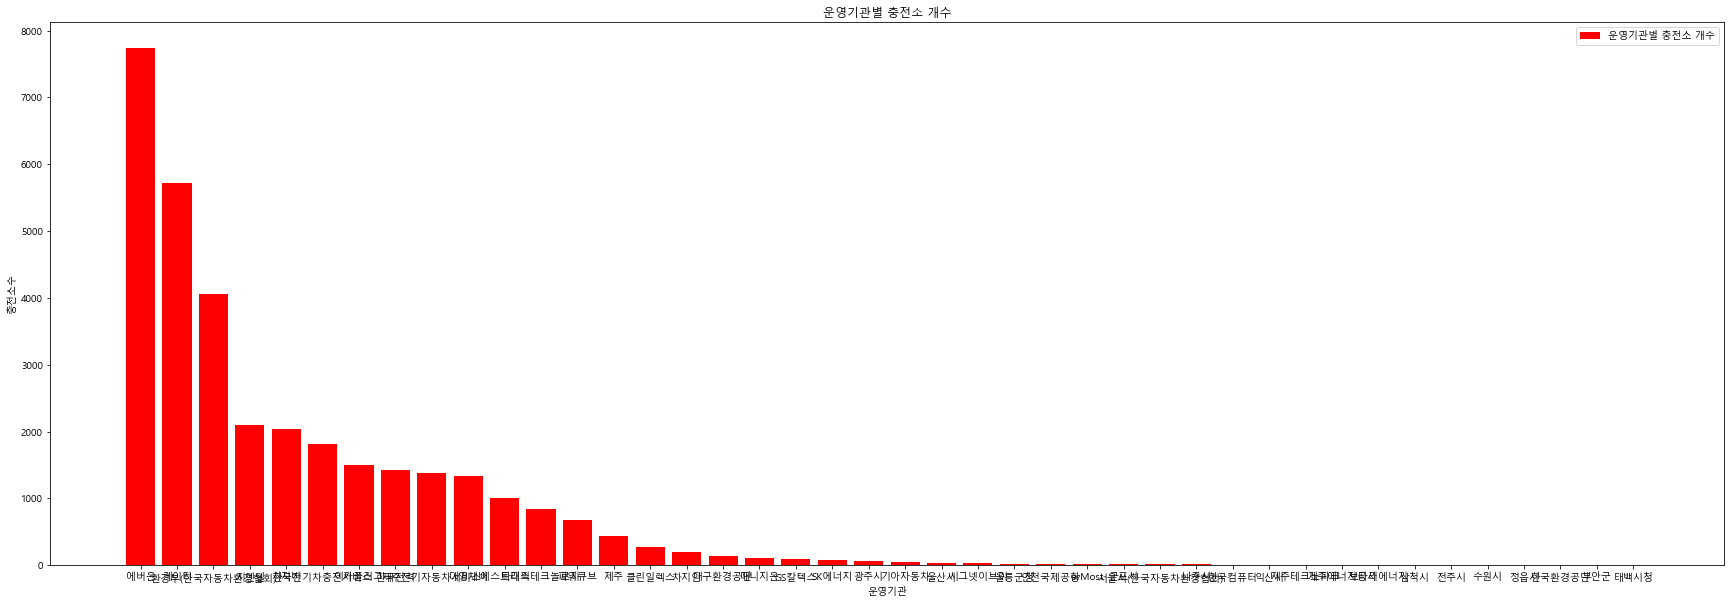

In [95]:
plt.figure(figsize=(30,10))
plt.bar(operater.index, operater.values, label='운영기관별 충전소 개수', color='r')
plt.title('운영기관별 충전소 개수') 
plt.xlabel('운영기관')
plt.ylabel('충전소수')
plt.legend()
plt.show()
 #에버온 > 케이티> 환경부 순  

In [116]:
#도시별 충전소 개수 
city_ct = char_df['지역'].value_counts().sort_values(ascending=False)
city_ct = city_ct.to_frame()
city_ct = city_ct.rename(columns = {'지역':'충전소개수'})
city_ct

,충전소개수
경기,7349
서울,3585
제주,3109
경북,2140
경남,2042
충남,2030
전남,1810
전북,1673
강원,1599
대구,1361


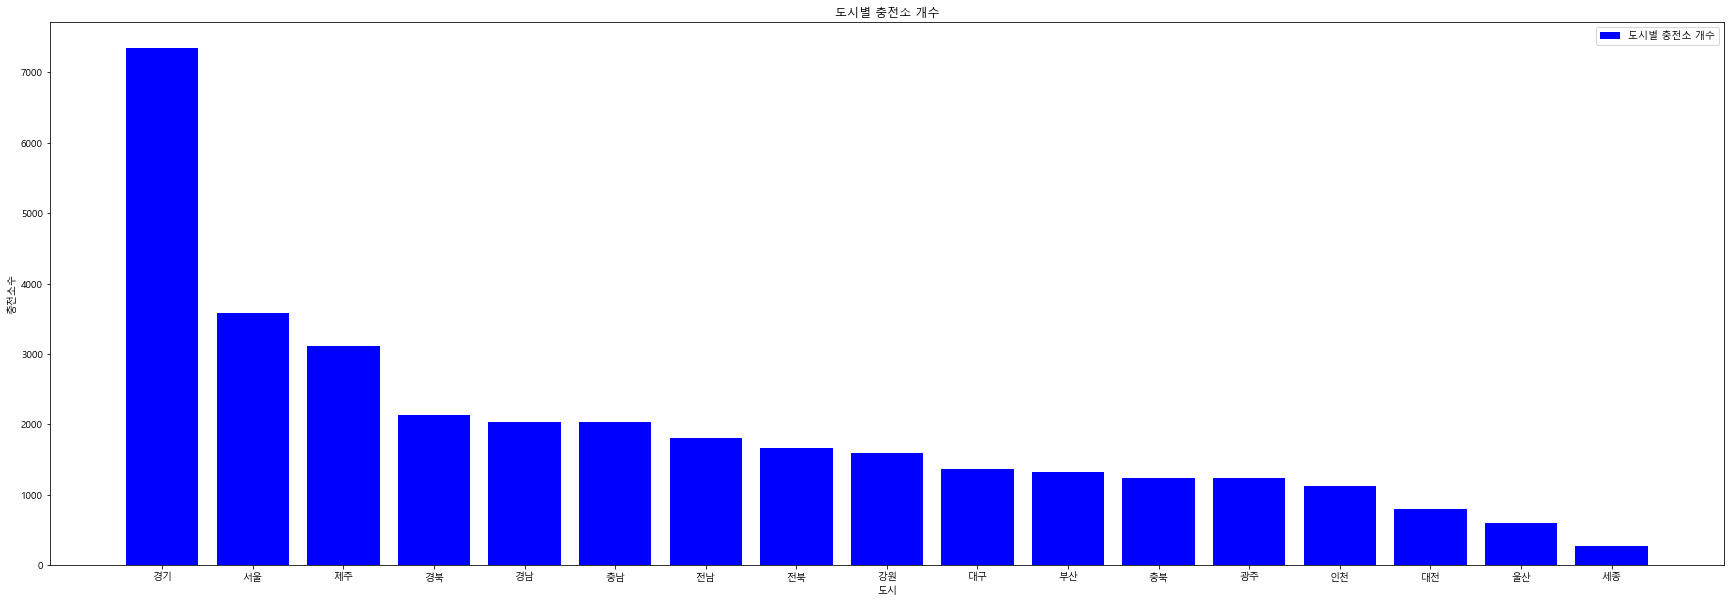

In [97]:
plt.figure(figsize=(30,10))
plt.bar(city_ct.index, city_ct.values, label='도시별 충전소 개수', color='b')
plt.title('도시별 충전소 개수') 
plt.xlabel('도시')
plt.ylabel('충전소수')
plt.legend()
plt.show()

In [98]:
# 충전소 데이타 filtering 
map_df = char_df.filter(items=['지역','시군구','충전소','주소','급속충전량'])
map_df

,지역,시군구,충전소,주소,급속충전량
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속(50kW)
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속(50kW)
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속(50kW)
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속(50kW)
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속(50kW)
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,NaN
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,NaN
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,NaN
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,NaN


In [99]:
# 완속 충전기에 대해 표시안되어 있음을 완속으로 변경 
map_df = map_df.replace(np.nan,'완속')
map_df           

,지역,시군구,충전소,주소,급속충전량
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속(50kW)
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속(50kW)
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속(50kW)
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속(50kW)
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속(50kW)
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속


In [100]:
#급속 종류 코멘트 '급속'으로 일괄 변경 (update)
map_df = map_df.replace('급속(50kW)','급속')
map_df = map_df.replace('급속(200kW동시)','급속')
map_df = map_df.replace('급속(100kW멀티)','급속')
map_df = map_df.replace('급속(100kW동시)','급속')
map_df = map_df.replace('급속(400kW동시)','급속')
map_df = map_df.replace('급속(500kW동시)','급속')
map_df = map_df.replace('급속(600kW동시)','급속')
map_df = map_df.replace('급속(700kW동시)','급속')
map_df = map_df.replace('급속(1000kW동시)','급속')
map_df.head() 


,지역,시군구,충전소,주소,급속충전량
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속


In [101]:
# 급속충전량 칼럼 급속/완속으로 변경 
map_df = map_df.rename(columns = {'급속충전량':'급속/완속'})
map_df

,지역,시군구,충전소,주소,급속/완속
0,서울,종로구,종묘 공영주차장,"서울특별시 종로구 종로 157 , 지하주차장 4층 하층 T구역(훈정동 1-2)",급속
1,서울,종로구,세종로 공영주차장,"서울특별시 종로구 세종대로 189 , 지하주차장 4층 D구역 계단실 앞(세종로 80-1)",급속
2,서울,중구,그랜드앰배서더 서울,"서울특별시 중구 동호로 287 , 대형버스주차장(장충동2가 186-54)",급속
3,서울,용산구,한강진역 공영주차장,"서울특별시 용산구 한남동 산10-84 , 지상실외주차장",급속
4,서울,성동구,마장동사무소 앞(공중전화부스),서울특별시 성동구 마장동 808 (마장동 808),급속
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속


In [102]:
#도시별 충전소수_급속/완속 (update)
citybeul_fs = map_df.groupby(['지역','급속/완속']).agg([len])
citybeul_fs

시군구   충전소    주소
           len   len   len
지역 급속/완속                  
강원 급속      394   394   394
   완속     1205  1205  1205
경기 급속      508   508   508
   완속     6841  6841  6841
경남 급속      295   295   295
   완속     1747  1747  1747
경북 급속      488   488   488
   완속     1652  1652  1652
광주 급속       73    73    73
   완속     1163  1163  1163
대구 급속      129   129   129
   완속     1232  1232  1232
대전 급속       95    95    95
   완속      707   707   707
부산 급속       83    83    83
   완속     1241  1241  1241
서울 급속      262   262   262
   완속     3323  3323  3323
세종 급속       34    34    34
   완속      238   238   238
울산 급속      114   114   114
   완속      483   483   483
인천 급속      125   125   125
   완속      998   998   998
전남 급속      369   369   369
   완속     1441  1441  1441
전북 급속      271   271   271
   완속     1402  1402  1402
제주 급속      253   253   253
   완속     2856  2856  2856
충남 급속      320   320   320
   완속     1710  1710  1710
충북 급속      250   250   250
   완속      994   994   994

In [103]:
#울산시 충전소 정보 데이타 
ulsan_map_df = map_df.loc[map_df['지역'].str.contains('울산')]
ulsan_map_df
    

,지역,시군구,충전소,주소,급속/완속
83,울산,중구,울산 중구 동천체육관,울산광역시 중구 염포로 85 동천 체육관 동편 주차장(남외동 673),급속
84,울산,동구,울산 동구 전하체육센터,울산광역시 동구 봉수로 285 전하체육센터 주차장 입구옆(전하동 559-8),급속
85,울산,북구,울산시 북구청,울산광역시 북구 연암동 산업로 1010 북구청,급속
86,울산,북구,농소2동 주민센터,울산광역시 북구 찬샘1길 24 (찬샘1길 24),급속
87,울산,울주군,울산 울주군 서생면사무소,울산광역시 울주군 서생면 해맞이로 894 서생면사무소 청사 건물 출입구 우측 주차장,급속
...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속


In [104]:
# 울산 급속 충전 vs 완속 충전기 개수 
ulsan_fast = ulsan_map_df['급속/완속'].value_counts().sort_values(ascending=False)
ulsan_fast

완속    483
급속    114
Name: 급속/완속, dtype: int64

In [105]:
#울산 시군구별 충전소 개수 
ulsan_elec_qty_df = ulsan_map_df['시군구'].value_counts().sort_values(ascending=False)
ulsan_elec_qty_df

울주군     224
남구      153
북구       89
중구       88
동구       43
Name: 시군구, dtype: int64

In [106]:
#울산 시군구별 급속/완속 충전기 
#ulsan_elec__fs = ulsan_map_df.groupby('시군구')['급속/완속'].value_counts().sort_values(ascending=False)
ulsan_elec__fs = ulsan_map_df.groupby('시군구')['급속/완속'].value_counts()
ulsan_elec__fs 

시군구   급속/완속
남구    완속       114
      급속        39
동구    완속        32
      급속        11
북구    완속        58
      급속        31
울주군   완속       203
      급속        21
중구    완속        76
      급속        12
Name: 급속/완속, dtype: int64

In [140]:
df1=elec_df.iloc[33]
df1= df1.to_frame()
df1

,2020. 10
서울,16960
부산,4216
대구,9068
인천,4027
광주,3003
대전,3400
울산,3433
세종,864
경기,15499
강원,3362


In [145]:
df2=city_ct
df2

,충전소개수
경기,7349
서울,3585
제주,3109
경북,2140
경남,2042
충남,2030
전남,1810
전북,1673
강원,1599
대구,1361


In [167]:
# 전기차 수 대비 충전소 비율 
rate_ec = pd.concat([df1,df2],axis=1)
rate_ec = round(rate_ec['충전소개수']/rate_ec['2020. 10'],2).sort_values(ascending=False)
rate_ec = rate_ec.to_frame()
rate_ec

,0
전북,0.67
경북,0.53
전남,0.50
충남,0.48
강원,0.48
경기,0.47
경남,0.42
광주,0.41
충북,0.40
세종,0.31


In [163]:
for i in ulsan_map_df.index:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + ulsan_map_df.loc[i, '주소']
    rest_api_key = 'ff47bfb2076f314e4f49c060d75b9464'
    header = {'Authorization': 'KakaoAK ' + rest_api_key}
    resp = requests.get(url, headers=header)
    
    if resp.status_code == 200:
        jsondata = resp.json()
        if jsondata["meta"]["total_count"] == 0 :
            ulsan_map_df.loc[i, '위도'] = np.nan
            ulsan_map_df.loc[i, '경도'] = np.nan
        else :
            ulsan_map_df.loc[i, '위도'] = jsondata["documents"][0]["address"]["y"]
            ulsan_map_df.loc[i, '경도'] = jsondata["documents"][0]["address"]["x"]
    else:
        ulsan_map_df.loc[i, '위도'] = "ERROR[" + str(r.status_code) + "]"
        ulsan_map_df.loc[i, '경도'] = "ERROR[" + str(r.status_code) + "]"
    
ulsan_map_df

,지역,시군구,충전소,주소,급속/완속,위도,경도
83,울산,중구,울산 중구 동천체육관,울산광역시 중구 염포로 85 동천 체육관 동편 주차장(남외동 673),급속,35.5610411920161,129.350485875962
84,울산,동구,울산 동구 전하체육센터,울산광역시 동구 봉수로 285 전하체육센터 주차장 입구옆(전하동 559-8),급속,35.5120000408547,129.422104364529
85,울산,북구,울산시 북구청,울산광역시 북구 연암동 산업로 1010 북구청,급속,35.5827074162639,129.36125360734
86,울산,북구,농소2동 주민센터,울산광역시 북구 찬샘1길 24 (찬샘1길 24),급속,35.6382902239359,129.348312442367
87,울산,울주군,울산 울주군 서생면사무소,울산광역시 울주군 서생면 해맞이로 894 서생면사무소 청사 건물 출입구 우측 주차장,급속,35.3499581076443,129.325938801114
...,...,...,...,...,...,...,...
33291,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속,35.5561186887712,129.068414910396
33292,울산,울주군,영남알프스복합웰컴센터,울산광역시 울주군 상북면 등억알프스리 517,완속,35.5561186887712,129.068414910396
33293,울산,울주군,언양읍 행정복지센터,울산광역시 울주군 언양읍 동문길 7,완속,35.5694147552733,129.125783085577
33294,울산,북구,화봉공원 공영주차장,울산광역시 북구 화봉동 445-1,완속,35.5889950493028,129.364458028869


In [156]:
ulsan_map_df = ulsan_map_df.dropna()

In [157]:
ulsan_map = folium.Map(location=[35.5610411920161,129.350485875962], zoom_start=12, tiles='OpenStreetMap')
ulsan_map

In [158]:
marker = folium.Marker([35.5610411920161,129.350485875962], popup='동천체육관', tooltip='환영합니다', icon=folium.Icon(icon='home', color='red'))
marker.add_to(ulsan_map)
ulsan_map.save('울산_충전소_현황.html')
ulsan_map

In [159]:
#지도로 표기
for i in ulsan_map_df.index:
    lat = ulsan_map_df.loc[i, '위도']
    lng = ulsan_map_df.loc[i, '경도']
    contents = folium.Popup('<b>'+ulsan_map_df.loc[i, '충전소']+'</b>'+'<br>'+ulsan_map_df.loc[i, '주소'], max_width=300)
    
    mark_type = ulsan_map_df.loc[i, '급속/완속']
    
    if mark_type == '급속':
        marker = folium.Marker([lat, lng], popup=contents, icon=folium.Icon(icon='home', color='red'))
    elif mark_type == '완속':
        marker = folium.Marker([lat, lng], popup=contents, icon=folium.Icon(icon='glass', color='black'))
    else :
        marker = folium.Marker([lat, lng], popup=contents, icon=folium.Icon(icon='bookmark', color='blue'))

    marker.add_to(ulsan_map)
    
ulsan_map.save('울산_충전소_현황.html')
ulsan_map
